**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

# 1. 캐글 산탄데르 고객 만족 예측

산탄데르 은행이 캐글에 경연을 의뢰한 데이터로 피처 이름은 모두 익명 처리돼 이름만을 가지고 어떤 속성인지는 알 수 없다.

레이블 값은 1이면 불만을 가진 고객, 0이면 만족한 고객이다.

## 1.1 데이터 불러오기 및 전처리

In [3]:
cust_df = pd.read_csv("./santander_customer_satisfaction/train.csv", encoding="latin-1")
cust_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
cust_df.info()
print("결측값의 수:", cust_df.isna().sum().sum())
print("타겟 type:", cust_df.TARGET.dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
결측값의 수: 0
타겟 type: int64


- 76,020개의 행, 371개의 열로 이루어져있으며 결측값은 없다.


- 370개의 피처 중 float형이 111개, int형이 259개이다.

In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


- var3의 경우 최소값이 -999999이다. 이는 NaN값이나 특정 예외 값을 변환한 것으로 판단된다.


- ID의 경우 단순 식별자이므로 필요 없다.

In [6]:
print(cust_df.var3.value_counts().sort_index()[:1])

-999999    116
Name: var3, dtype: int64


- -999999가 116개가 존재하며 다른 값에 비해 std가 심하므로 최빈값으로 변환한다.

In [7]:
from scipy.stats import mode

# var3 최빈값
var3_mode = mode(cust_df.var3.values)[0][0]

# var3 대체, ID 제거
cust_df["var3"].replace(-999999, var3_mode, inplace=True)
cust_df.drop("ID", axis=1, inplace=True)

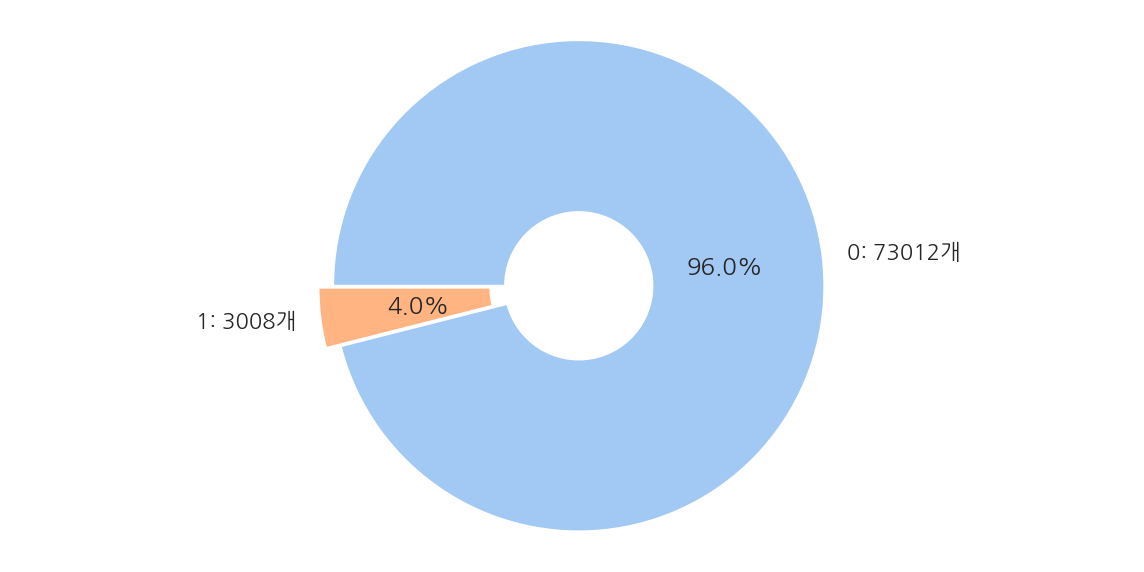

In [8]:
plt.figure(figsize=(10,5))

frequency = cust_df['TARGET'].value_counts()
label = [f"0: {frequency[0]}개", f"1: {frequency[1]}개"]

plt.pie(frequency,
    startangle = 180,
    counterclock = False,
    explode = [0.03] * 2,
    autopct = '%1.1f%%',
    labels = label,
    colors = sns.color_palette('pastel', 2),
    wedgeprops = dict(width=0.7)
  )


plt.axis('equal')
plt.show()

- 전체 76,020개 데이터 중 만족이 73,012개(96.0%), 불만족이 3,008개(4.0%)로 이루어져 있다.


- 대부분이 0(만족)이므로 정확도보다는 ROC-AUC로 성능을 평가한다.

## 1.2 성능 평가

In [9]:
from sklearn.model_selection import train_test_split

# 피처, 레이블 분리
X_features = cust_df.iloc[:,:-1]
y_label = cust_df.iloc[:,-1]

# train, test
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=0)

print("train 레이블 분포")
print(y_train.value_counts() / y_train.count() * 100)
print("-"*30)
print("test 레이블 분포")
print(y_test.value_counts() / y_test.count() * 100)

train 레이블 분포
0    96.096422
1     3.903578
Name: TARGET, dtype: float64
------------------------------
test 레이블 분포
0    95.830045
1     4.169955
Name: TARGET, dtype: float64


- train과 test 모두 레이블의 분포는 원 데이터와 유사하게 만들어졌다.

### 1.2.1 XGBoost

**XGB 학습**

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# XGB 객체 생성
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156)

# 학습 - 조기 중단 설정, 성능 평가 AUC
evals = [ (X_train, y_train), (X_test, y_test)] # test set 사용은 과적합 주의
xgb_clf.fit(X_train, y_train,
            early_stopping_rounds=100, eval_metric="auc", eval_set=evals)

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- n_estimators를 500으로 설정하였고 평가 set으로 train과 test를 사용하였을 때 114번 반복 후 조기 중단 되었다.

**XGB 예측/평가**

In [11]:
# 예측 확률
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:,1].reshape(-1,1)

# 평가
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_proba, average="macro")
print(f"AUC: {xgb_roc_auc:.4f}")

AUC: 0.8413


- test set으로 예측시 AUC는 약 0.8413으로 나타났다.

**XGB GridSearchCV**

In [12]:
from sklearn.model_selection import GridSearchCV

# XGB 객체 생성 - n_estimators 감소
xgb_clf2 = XGBClassifier(n_estimators = 100, random_state = 156)

# 하이퍼 파라미터
params = {
    "max_depth": [5, 7], # 깊이
    "min_child_weight": [1, 3], # 가지 분할 가중치 
    "colsample_bytree": [0.5, 0.75] # 피처 선택 비율
}

# GridSearchCV
evals = [ (X_train, y_train), (X_test, y_test)] # test set 사용은 과적합 주의

grid_cv = GridSearchCV(xgb_clf2, param_grid=params, cv=3)
grid_cv.fit(X_train, y_train,
            early_stopping_rounds=100, eval_metric="auc", eval_set=evals)

[0]	validation_0-auc:0.70629	validation_1-auc:0.71552
[1]	validation_0-auc:0.79529	validation_1-auc:0.80747
[2]	validation_0-auc:0.79939	validation_1-auc:0.80662
[3]	validation_0-auc:0.80449	validation_1-auc:0.80695
[4]	validation_0-auc:0.80267	validation_1-auc:0.80336
[5]	validation_0-auc:0.82025	validation_1-auc:0.81848
[6]	validation_0-auc:0.82861	validation_1-auc:0.82517
[7]	validation_0-auc:0.84012	validation_1-auc:0.83344
[8]	validation_0-auc:0.84475	validation_1-auc:0.83705
[9]	validation_0-auc:0.84382	validation_1-auc:0.83378
[10]	validation_0-auc:0.84814	validation_1-auc:0.83654
[11]	validation_0-auc:0.84906	validation_1-auc:0.83434
[12]	validation_0-auc:0.85282	validation_1-auc:0.83742
[13]	validation_0-auc:0.85296	validation_1-auc:0.83479
[14]	validation_0-auc:0.85563	validation_1-auc:0.83805
[15]	validation_0-auc:0.85613	validation_1-auc:0.83747
[16]	validation_0-auc:0.85905	validation_1-auc:0.83818
[17]	validation_0-auc:0.86026	validation_1-auc:0.83860
[18]	validation_0-au

[50]	validation_0-auc:0.87942	validation_1-auc:0.84030
[51]	validation_0-auc:0.88040	validation_1-auc:0.83995
[52]	validation_0-auc:0.88070	validation_1-auc:0.83985
[53]	validation_0-auc:0.88092	validation_1-auc:0.83993
[54]	validation_0-auc:0.88111	validation_1-auc:0.84001
[55]	validation_0-auc:0.88139	validation_1-auc:0.83990
[56]	validation_0-auc:0.88152	validation_1-auc:0.83984
[57]	validation_0-auc:0.88162	validation_1-auc:0.83943
[58]	validation_0-auc:0.88163	validation_1-auc:0.83936
[59]	validation_0-auc:0.88248	validation_1-auc:0.83960
[60]	validation_0-auc:0.88301	validation_1-auc:0.83929
[61]	validation_0-auc:0.88323	validation_1-auc:0.83912
[62]	validation_0-auc:0.88331	validation_1-auc:0.83889
[63]	validation_0-auc:0.88338	validation_1-auc:0.83877
[64]	validation_0-auc:0.88371	validation_1-auc:0.83879
[65]	validation_0-auc:0.88391	validation_1-auc:0.83861
[66]	validation_0-auc:0.88419	validation_1-auc:0.83863
[67]	validation_0-auc:0.88428	validation_1-auc:0.83889
[68]	valid

[0]	validation_0-auc:0.70730	validation_1-auc:0.71971
[1]	validation_0-auc:0.81282	validation_1-auc:0.82050
[2]	validation_0-auc:0.80737	validation_1-auc:0.81381
[3]	validation_0-auc:0.80999	validation_1-auc:0.81404
[4]	validation_0-auc:0.80732	validation_1-auc:0.80976
[5]	validation_0-auc:0.82347	validation_1-auc:0.82367
[6]	validation_0-auc:0.83316	validation_1-auc:0.82986
[7]	validation_0-auc:0.83968	validation_1-auc:0.83484
[8]	validation_0-auc:0.84392	validation_1-auc:0.83817
[9]	validation_0-auc:0.84441	validation_1-auc:0.83352
[10]	validation_0-auc:0.84829	validation_1-auc:0.83487
[11]	validation_0-auc:0.84967	validation_1-auc:0.83502
[12]	validation_0-auc:0.85287	validation_1-auc:0.83856
[13]	validation_0-auc:0.85227	validation_1-auc:0.83670
[14]	validation_0-auc:0.85519	validation_1-auc:0.83828
[15]	validation_0-auc:0.85502	validation_1-auc:0.83754
[16]	validation_0-auc:0.85738	validation_1-auc:0.83830
[17]	validation_0-auc:0.85796	validation_1-auc:0.83819
[18]	validation_0-au

[50]	validation_0-auc:0.87457	validation_1-auc:0.84019
[51]	validation_0-auc:0.87503	validation_1-auc:0.83996
[52]	validation_0-auc:0.87565	validation_1-auc:0.84004
[53]	validation_0-auc:0.87601	validation_1-auc:0.84013
[54]	validation_0-auc:0.87659	validation_1-auc:0.83911
[55]	validation_0-auc:0.87733	validation_1-auc:0.83854
[56]	validation_0-auc:0.87797	validation_1-auc:0.83896
[57]	validation_0-auc:0.87829	validation_1-auc:0.83907
[58]	validation_0-auc:0.87841	validation_1-auc:0.83883
[59]	validation_0-auc:0.87849	validation_1-auc:0.83878
[60]	validation_0-auc:0.87892	validation_1-auc:0.83880
[61]	validation_0-auc:0.87916	validation_1-auc:0.83896
[62]	validation_0-auc:0.87917	validation_1-auc:0.83903
[63]	validation_0-auc:0.87919	validation_1-auc:0.83906
[64]	validation_0-auc:0.87928	validation_1-auc:0.83913
[65]	validation_0-auc:0.87953	validation_1-auc:0.83915
[66]	validation_0-auc:0.87992	validation_1-auc:0.83897
[67]	validation_0-auc:0.88007	validation_1-auc:0.83857
[68]	valid

[0]	validation_0-auc:0.70988	validation_1-auc:0.72112
[1]	validation_0-auc:0.81635	validation_1-auc:0.81921
[2]	validation_0-auc:0.81263	validation_1-auc:0.81273
[3]	validation_0-auc:0.81736	validation_1-auc:0.80951
[4]	validation_0-auc:0.81539	validation_1-auc:0.80736
[5]	validation_0-auc:0.83280	validation_1-auc:0.81902
[6]	validation_0-auc:0.84582	validation_1-auc:0.82711
[7]	validation_0-auc:0.85297	validation_1-auc:0.83219
[8]	validation_0-auc:0.85832	validation_1-auc:0.83540
[9]	validation_0-auc:0.85882	validation_1-auc:0.83191
[10]	validation_0-auc:0.86339	validation_1-auc:0.83334
[11]	validation_0-auc:0.86325	validation_1-auc:0.83105
[12]	validation_0-auc:0.86805	validation_1-auc:0.83303
[13]	validation_0-auc:0.86816	validation_1-auc:0.83069
[14]	validation_0-auc:0.87290	validation_1-auc:0.83445
[15]	validation_0-auc:0.87374	validation_1-auc:0.83203
[16]	validation_0-auc:0.87604	validation_1-auc:0.83167
[17]	validation_0-auc:0.87708	validation_1-auc:0.82994
[18]	validation_0-au

[50]	validation_0-auc:0.90084	validation_1-auc:0.83570
[51]	validation_0-auc:0.90130	validation_1-auc:0.83522
[52]	validation_0-auc:0.90158	validation_1-auc:0.83502
[53]	validation_0-auc:0.90207	validation_1-auc:0.83480
[54]	validation_0-auc:0.90238	validation_1-auc:0.83434
[55]	validation_0-auc:0.90275	validation_1-auc:0.83411
[56]	validation_0-auc:0.90270	validation_1-auc:0.83339
[57]	validation_0-auc:0.90266	validation_1-auc:0.83340
[58]	validation_0-auc:0.90261	validation_1-auc:0.83302
[59]	validation_0-auc:0.90335	validation_1-auc:0.83277
[60]	validation_0-auc:0.90423	validation_1-auc:0.83158
[61]	validation_0-auc:0.90428	validation_1-auc:0.83163
[62]	validation_0-auc:0.90425	validation_1-auc:0.83193
[63]	validation_0-auc:0.90428	validation_1-auc:0.83163
[64]	validation_0-auc:0.90437	validation_1-auc:0.83108
[65]	validation_0-auc:0.90452	validation_1-auc:0.83129
[66]	validation_0-auc:0.90472	validation_1-auc:0.83115
[67]	validation_0-auc:0.90474	validation_1-auc:0.83120
[68]	valid

[0]	validation_0-auc:0.71065	validation_1-auc:0.72162
[1]	validation_0-auc:0.81004	validation_1-auc:0.81744
[2]	validation_0-auc:0.81166	validation_1-auc:0.81353
[3]	validation_0-auc:0.81782	validation_1-auc:0.81079
[4]	validation_0-auc:0.81689	validation_1-auc:0.80561
[5]	validation_0-auc:0.83478	validation_1-auc:0.82049
[6]	validation_0-auc:0.84517	validation_1-auc:0.82760
[7]	validation_0-auc:0.85094	validation_1-auc:0.83378
[8]	validation_0-auc:0.85686	validation_1-auc:0.83678
[9]	validation_0-auc:0.85629	validation_1-auc:0.83338
[10]	validation_0-auc:0.86106	validation_1-auc:0.83592
[11]	validation_0-auc:0.86092	validation_1-auc:0.83293
[12]	validation_0-auc:0.86557	validation_1-auc:0.83586
[13]	validation_0-auc:0.86594	validation_1-auc:0.83273
[14]	validation_0-auc:0.86910	validation_1-auc:0.83553
[15]	validation_0-auc:0.86984	validation_1-auc:0.83451
[16]	validation_0-auc:0.87178	validation_1-auc:0.83443
[17]	validation_0-auc:0.87223	validation_1-auc:0.83423
[18]	validation_0-au

[50]	validation_0-auc:0.89307	validation_1-auc:0.83303
[51]	validation_0-auc:0.89323	validation_1-auc:0.83251
[52]	validation_0-auc:0.89357	validation_1-auc:0.83216
[53]	validation_0-auc:0.89390	validation_1-auc:0.83188
[54]	validation_0-auc:0.89437	validation_1-auc:0.83034
[55]	validation_0-auc:0.89448	validation_1-auc:0.83047
[56]	validation_0-auc:0.89460	validation_1-auc:0.83028
[57]	validation_0-auc:0.89501	validation_1-auc:0.82981
[58]	validation_0-auc:0.89506	validation_1-auc:0.82986
[59]	validation_0-auc:0.89517	validation_1-auc:0.82989
[60]	validation_0-auc:0.89541	validation_1-auc:0.82976
[61]	validation_0-auc:0.89546	validation_1-auc:0.82976
[62]	validation_0-auc:0.89578	validation_1-auc:0.82939
[63]	validation_0-auc:0.89586	validation_1-auc:0.82883
[64]	validation_0-auc:0.89626	validation_1-auc:0.82844
[65]	validation_0-auc:0.89622	validation_1-auc:0.82842
[66]	validation_0-auc:0.89689	validation_1-auc:0.82725
[67]	validation_0-auc:0.89711	validation_1-auc:0.82635
[68]	valid

[0]	validation_0-auc:0.70662	validation_1-auc:0.71616
[1]	validation_0-auc:0.81153	validation_1-auc:0.81559
[2]	validation_0-auc:0.80587	validation_1-auc:0.80991
[3]	validation_0-auc:0.80616	validation_1-auc:0.80560
[4]	validation_0-auc:0.82230	validation_1-auc:0.81970
[5]	validation_0-auc:0.83247	validation_1-auc:0.82859
[6]	validation_0-auc:0.84039	validation_1-auc:0.83377
[7]	validation_0-auc:0.84494	validation_1-auc:0.83628
[8]	validation_0-auc:0.84656	validation_1-auc:0.83730
[9]	validation_0-auc:0.84738	validation_1-auc:0.83494
[10]	validation_0-auc:0.85046	validation_1-auc:0.83759
[11]	validation_0-auc:0.85138	validation_1-auc:0.83460
[12]	validation_0-auc:0.85531	validation_1-auc:0.83712
[13]	validation_0-auc:0.85683	validation_1-auc:0.83441
[14]	validation_0-auc:0.85931	validation_1-auc:0.83523
[15]	validation_0-auc:0.86068	validation_1-auc:0.83563
[16]	validation_0-auc:0.86192	validation_1-auc:0.83572
[17]	validation_0-auc:0.86342	validation_1-auc:0.83627
[18]	validation_0-au

[50]	validation_0-auc:0.88355	validation_1-auc:0.83951
[51]	validation_0-auc:0.88373	validation_1-auc:0.83963
[52]	validation_0-auc:0.88383	validation_1-auc:0.83952
[53]	validation_0-auc:0.88397	validation_1-auc:0.83946
[54]	validation_0-auc:0.88404	validation_1-auc:0.83922
[55]	validation_0-auc:0.88414	validation_1-auc:0.83927
[56]	validation_0-auc:0.88442	validation_1-auc:0.83897
[57]	validation_0-auc:0.88442	validation_1-auc:0.83900
[58]	validation_0-auc:0.88501	validation_1-auc:0.83900
[59]	validation_0-auc:0.88525	validation_1-auc:0.83890
[60]	validation_0-auc:0.88531	validation_1-auc:0.83855
[61]	validation_0-auc:0.88597	validation_1-auc:0.83946
[62]	validation_0-auc:0.88634	validation_1-auc:0.84000
[63]	validation_0-auc:0.88635	validation_1-auc:0.83986
[64]	validation_0-auc:0.88651	validation_1-auc:0.83954
[65]	validation_0-auc:0.88665	validation_1-auc:0.83936
[66]	validation_0-auc:0.88716	validation_1-auc:0.83884
[67]	validation_0-auc:0.88726	validation_1-auc:0.83878
[68]	valid

[0]	validation_0-auc:0.70720	validation_1-auc:0.71986
[1]	validation_0-auc:0.81541	validation_1-auc:0.82100
[2]	validation_0-auc:0.80745	validation_1-auc:0.81198
[3]	validation_0-auc:0.80812	validation_1-auc:0.81049
[4]	validation_0-auc:0.82289	validation_1-auc:0.82262
[5]	validation_0-auc:0.83308	validation_1-auc:0.83125
[6]	validation_0-auc:0.83965	validation_1-auc:0.83389
[7]	validation_0-auc:0.84310	validation_1-auc:0.83592
[8]	validation_0-auc:0.84495	validation_1-auc:0.83676
[9]	validation_0-auc:0.84669	validation_1-auc:0.83652
[10]	validation_0-auc:0.85050	validation_1-auc:0.83647
[11]	validation_0-auc:0.85214	validation_1-auc:0.83396
[12]	validation_0-auc:0.85472	validation_1-auc:0.83619
[13]	validation_0-auc:0.85511	validation_1-auc:0.83607
[14]	validation_0-auc:0.85780	validation_1-auc:0.83688
[15]	validation_0-auc:0.85839	validation_1-auc:0.83762
[16]	validation_0-auc:0.85946	validation_1-auc:0.83859
[17]	validation_0-auc:0.86029	validation_1-auc:0.83898
[18]	validation_0-au

[50]	validation_0-auc:0.87781	validation_1-auc:0.83821
[51]	validation_0-auc:0.87800	validation_1-auc:0.83829
[52]	validation_0-auc:0.87807	validation_1-auc:0.83849
[53]	validation_0-auc:0.87841	validation_1-auc:0.83822
[54]	validation_0-auc:0.87859	validation_1-auc:0.83825
[55]	validation_0-auc:0.87897	validation_1-auc:0.83703
[56]	validation_0-auc:0.87920	validation_1-auc:0.83664
[57]	validation_0-auc:0.87925	validation_1-auc:0.83661
[58]	validation_0-auc:0.87971	validation_1-auc:0.83698
[59]	validation_0-auc:0.87974	validation_1-auc:0.83702
[60]	validation_0-auc:0.87988	validation_1-auc:0.83675
[61]	validation_0-auc:0.87994	validation_1-auc:0.83640
[62]	validation_0-auc:0.88004	validation_1-auc:0.83624
[63]	validation_0-auc:0.88045	validation_1-auc:0.83560
[64]	validation_0-auc:0.88055	validation_1-auc:0.83532
[65]	validation_0-auc:0.88078	validation_1-auc:0.83470
[66]	validation_0-auc:0.88123	validation_1-auc:0.83502
[67]	validation_0-auc:0.88123	validation_1-auc:0.83510
[68]	valid

[0]	validation_0-auc:0.71047	validation_1-auc:0.72221
[1]	validation_0-auc:0.81439	validation_1-auc:0.81638
[2]	validation_0-auc:0.81398	validation_1-auc:0.81326
[3]	validation_0-auc:0.81613	validation_1-auc:0.80956
[4]	validation_0-auc:0.83523	validation_1-auc:0.82248
[5]	validation_0-auc:0.84579	validation_1-auc:0.83133
[6]	validation_0-auc:0.85342	validation_1-auc:0.83578
[7]	validation_0-auc:0.85681	validation_1-auc:0.83743
[8]	validation_0-auc:0.86130	validation_1-auc:0.83917
[9]	validation_0-auc:0.86332	validation_1-auc:0.83601
[10]	validation_0-auc:0.86731	validation_1-auc:0.83577
[11]	validation_0-auc:0.86994	validation_1-auc:0.83370
[12]	validation_0-auc:0.87352	validation_1-auc:0.83370
[13]	validation_0-auc:0.87406	validation_1-auc:0.83321
[14]	validation_0-auc:0.87678	validation_1-auc:0.83402
[15]	validation_0-auc:0.87806	validation_1-auc:0.83455
[16]	validation_0-auc:0.87903	validation_1-auc:0.83401
[17]	validation_0-auc:0.88024	validation_1-auc:0.83342
[18]	validation_0-au

[50]	validation_0-auc:0.90258	validation_1-auc:0.83194
[51]	validation_0-auc:0.90295	validation_1-auc:0.83104
[52]	validation_0-auc:0.90295	validation_1-auc:0.83124
[53]	validation_0-auc:0.90325	validation_1-auc:0.83104
[54]	validation_0-auc:0.90360	validation_1-auc:0.83084
[55]	validation_0-auc:0.90380	validation_1-auc:0.83071
[56]	validation_0-auc:0.90458	validation_1-auc:0.82970
[57]	validation_0-auc:0.90494	validation_1-auc:0.82918
[58]	validation_0-auc:0.90514	validation_1-auc:0.82902
[59]	validation_0-auc:0.90526	validation_1-auc:0.82932
[60]	validation_0-auc:0.90537	validation_1-auc:0.82910
[61]	validation_0-auc:0.90551	validation_1-auc:0.82897
[62]	validation_0-auc:0.90552	validation_1-auc:0.82902
[63]	validation_0-auc:0.90552	validation_1-auc:0.82955
[64]	validation_0-auc:0.90548	validation_1-auc:0.82945
[65]	validation_0-auc:0.90553	validation_1-auc:0.82944
[66]	validation_0-auc:0.90569	validation_1-auc:0.82931
[67]	validation_0-auc:0.90568	validation_1-auc:0.82918
[68]	valid

[0]	validation_0-auc:0.71049	validation_1-auc:0.72196
[1]	validation_0-auc:0.81327	validation_1-auc:0.82008
[2]	validation_0-auc:0.81336	validation_1-auc:0.81399
[3]	validation_0-auc:0.81878	validation_1-auc:0.81036
[4]	validation_0-auc:0.83586	validation_1-auc:0.82293
[5]	validation_0-auc:0.84628	validation_1-auc:0.83130
[6]	validation_0-auc:0.85384	validation_1-auc:0.83488
[7]	validation_0-auc:0.85611	validation_1-auc:0.83615
[8]	validation_0-auc:0.85953	validation_1-auc:0.83628
[9]	validation_0-auc:0.86107	validation_1-auc:0.83506
[10]	validation_0-auc:0.86473	validation_1-auc:0.83596
[11]	validation_0-auc:0.86505	validation_1-auc:0.83404
[12]	validation_0-auc:0.86859	validation_1-auc:0.83710
[13]	validation_0-auc:0.86900	validation_1-auc:0.83285
[14]	validation_0-auc:0.87275	validation_1-auc:0.83406
[15]	validation_0-auc:0.87411	validation_1-auc:0.83398
[16]	validation_0-auc:0.87470	validation_1-auc:0.83462
[17]	validation_0-auc:0.87608	validation_1-auc:0.83316
[18]	validation_0-au

[50]	validation_0-auc:0.89392	validation_1-auc:0.83144
[51]	validation_0-auc:0.89435	validation_1-auc:0.83146
[52]	validation_0-auc:0.89443	validation_1-auc:0.83120
[53]	validation_0-auc:0.89445	validation_1-auc:0.83081
[54]	validation_0-auc:0.89474	validation_1-auc:0.83097
[55]	validation_0-auc:0.89475	validation_1-auc:0.83077
[56]	validation_0-auc:0.89500	validation_1-auc:0.83075
[57]	validation_0-auc:0.89520	validation_1-auc:0.83041
[58]	validation_0-auc:0.89529	validation_1-auc:0.83034
[59]	validation_0-auc:0.89608	validation_1-auc:0.83003
[60]	validation_0-auc:0.89637	validation_1-auc:0.82998
[61]	validation_0-auc:0.89657	validation_1-auc:0.83004
[62]	validation_0-auc:0.89683	validation_1-auc:0.82965
[63]	validation_0-auc:0.89720	validation_1-auc:0.82924
[64]	validation_0-auc:0.89769	validation_1-auc:0.82875
[65]	validation_0-auc:0.89862	validation_1-auc:0.82833
[66]	validation_0-auc:0.89866	validation_1-auc:0.82858
[67]	validation_0-auc:0.89867	validation_1-auc:0.82849
[68]	valid

[0]	validation_0-auc:0.73051	validation_1-auc:0.73459
[1]	validation_0-auc:0.82121	validation_1-auc:0.82006
[2]	validation_0-auc:0.82250	validation_1-auc:0.81301
[3]	validation_0-auc:0.82929	validation_1-auc:0.81297
[4]	validation_0-auc:0.82811	validation_1-auc:0.81024
[5]	validation_0-auc:0.84807	validation_1-auc:0.82472
[6]	validation_0-auc:0.85778	validation_1-auc:0.83542
[7]	validation_0-auc:0.86425	validation_1-auc:0.83664
[8]	validation_0-auc:0.86982	validation_1-auc:0.83979
[9]	validation_0-auc:0.87025	validation_1-auc:0.83861
[10]	validation_0-auc:0.87592	validation_1-auc:0.84043
[11]	validation_0-auc:0.87790	validation_1-auc:0.83839
[12]	validation_0-auc:0.88444	validation_1-auc:0.84194
[13]	validation_0-auc:0.88490	validation_1-auc:0.84118
[14]	validation_0-auc:0.88941	validation_1-auc:0.84270
[15]	validation_0-auc:0.89161	validation_1-auc:0.84076
[16]	validation_0-auc:0.89464	validation_1-auc:0.84200
[17]	validation_0-auc:0.89576	validation_1-auc:0.84185
[18]	validation_0-au

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=156,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [13]:
# 최적 하이퍼 파라미터
print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv.best_params_)

# 최적 하이퍼 파라미터로 예측 평가
best_xgb_clf = grid_cv.best_estimator_
best_pred_proba = best_xgb_clf.predict_proba(X_test)[:,1].reshape(-1,1)
best_roc_auc = roc_auc_score(y_test, best_pred_proba, average="macro")
print(f"GridSearchCV AUC: {best_roc_auc:.4f}")

GridSearchCV 최적 하이퍼 파라미터: {'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 1}
GridSearchCV AUC: 0.8429


- 최적 하이퍼 파라미터는 colsample_bytree: 0.5, max_depth: 7, min_child_weight: 1 이고, 이때 AUC는 0.8429이다.


- 앞서 AUC가 0.8413에서 미미하지만 조금 증가하였다.


- 수행시간이 확실히 오래 걸린다.

**XGB 피처별 중요도**

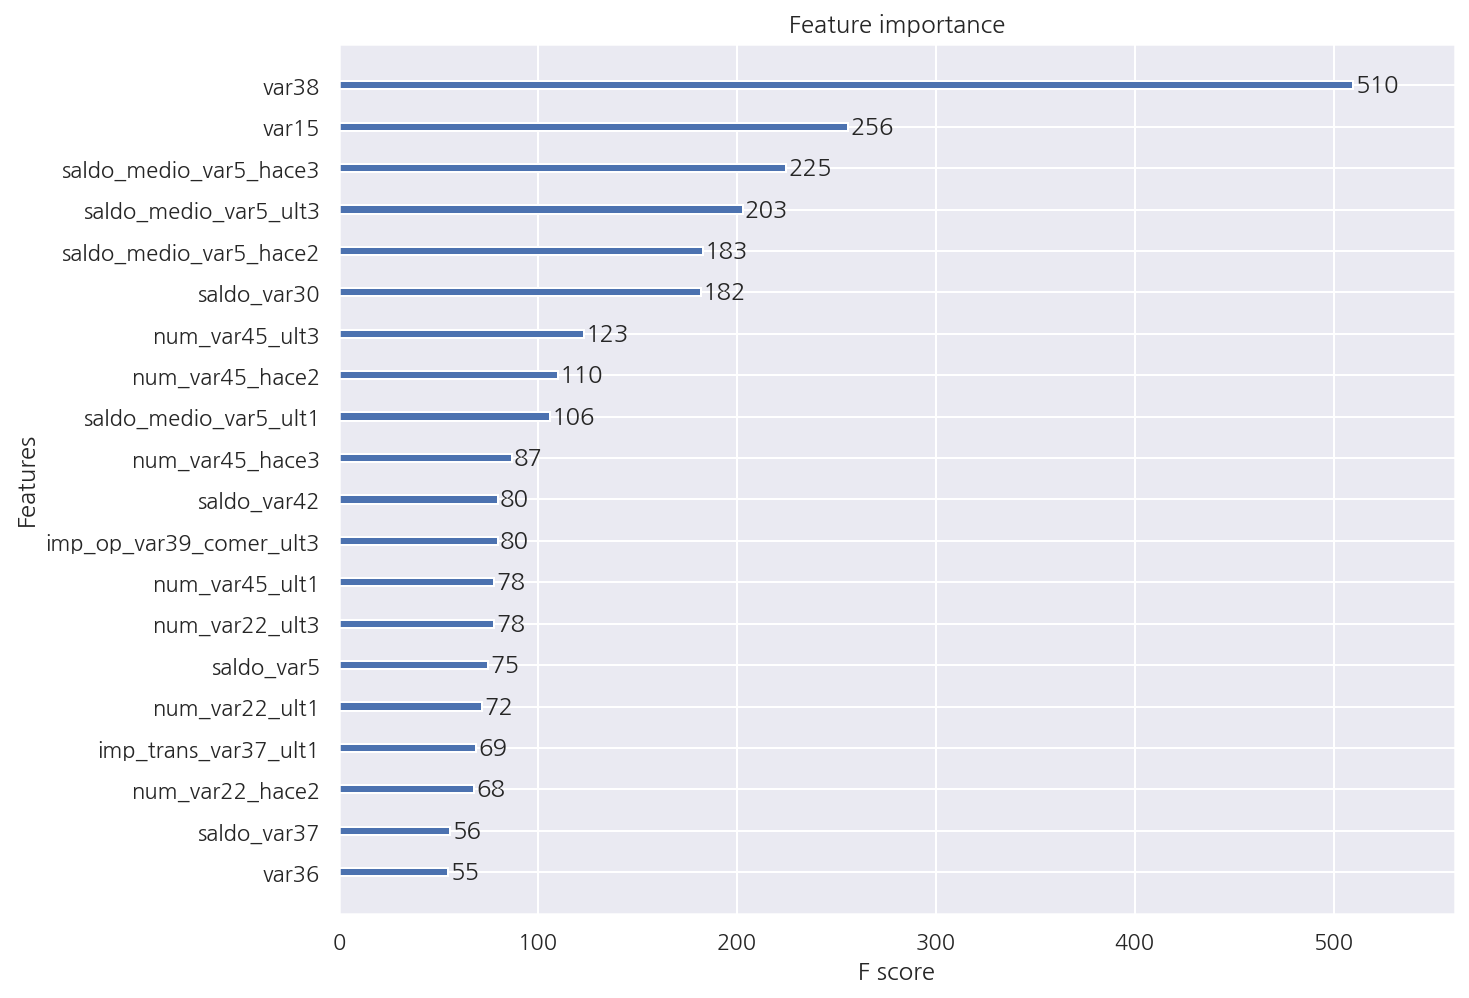

In [14]:
from xgboost import plot_importance

plot_importance(best_xgb_clf, max_num_features=20)
plt.show()

### 1.2.2 LightGBM

**LGBM 학습**

In [15]:
from lightgbm import LGBMClassifier

# LGBM 객체 생성
lgbm_clf = LGBMClassifier(n_estimators = 500, random_state = 156)

# 학습 - 조기 중단 설정, 성능 평가 AUC
evals = [ (X_test, y_test) ] # test set 사용은 과적합 주의
lgbm_clf.fit(X_train, y_train,
             early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
             verbose=True)

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

LGBMClassifier(n_estimators=500, random_state=156)

- 115번 반복 후 조기 중단되었다.

**LGBM 예측/평가**

In [16]:
# 예측 확률
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1].reshape(-1,1)

# 평가
lgbm_roc_auc = roc_auc_score(y_test, lgbm_pred_proba, average="macro")
print(f"AUC: {lgbm_roc_auc:.4f}")

AUC: 0.8409


- AUC는 0.8409로 XGB로 수행하였을 때보다는 작은 수치로 나타났다.

**LGBM GridSearchCV**

In [17]:
from sklearn.model_selection import GridSearchCV

# LGBM 객체 생성 - n_estimators 감소
lgbm_clf2 = LGBMClassifier(n_estimators = 200, random_state = 156)

# 하이퍼 파라미터
params = {
    "num_leaves": [32, 64], # 최대 리프 수
    "max_depth": [128, 160], # 깊이
    "min_child_samples": [60, 100], # 리프 최소 샘플 수
    "subsample": [0.8, 1] # 샘플 비율
}

# GridSearchCV
evals = [ (X_train, y_train), (X_test, y_test) ] # test set 사용은 과적합 주의

grid_cv2 = GridSearchCV(lgbm_clf2, param_grid=params, cv=3)
grid_cv2.fit(X_train, y_train,
             early_stopping_rounds=100, eval_metric="auc", eval_set=evals)

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	va

[75]	valid_0's auc: 0.892335	valid_0's binary_logloss: 0.116396	valid_1's auc: 0.828496	valid_1's binary_logloss: 0.142
[76]	valid_0's auc: 0.892413	valid_0's binary_logloss: 0.116309	valid_1's auc: 0.828479	valid_1's binary_logloss: 0.142037
[77]	valid_0's auc: 0.892724	valid_0's binary_logloss: 0.116193	valid_1's auc: 0.828775	valid_1's binary_logloss: 0.141984
[78]	valid_0's auc: 0.893152	valid_0's binary_logloss: 0.116087	valid_1's auc: 0.828763	valid_1's binary_logloss: 0.142013
[79]	valid_0's auc: 0.893164	valid_0's binary_logloss: 0.116022	valid_1's auc: 0.828658	valid_1's binary_logloss: 0.142056
[80]	valid_0's auc: 0.893358	valid_0's binary_logloss: 0.115878	valid_1's auc: 0.828923	valid_1's binary_logloss: 0.142009
[81]	valid_0's auc: 0.89346	valid_0's binary_logloss: 0.115789	valid_1's auc: 0.828949	valid_1's binary_logloss: 0.142048
[82]	valid_0's auc: 0.893828	valid_0's binary_logloss: 0.115606	valid_1's auc: 0.829065	valid_1's binary_logloss: 0.142024
[83]	valid_0's auc: 

[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.122414	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.13925
[37]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.122216	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.880036	valid_0's binary_logloss: 0.121998	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139306
[39]	valid_0's auc: 0.880641	valid_0's binary_logloss: 0.121716	valid_1's auc: 0.838787	valid_1's binary_logloss: 0.139269
[40]	valid_0's auc: 0.881249	valid_0's binary_logloss: 0.121482	valid_1's auc: 0.838906	valid_1's binary_logloss: 0.139223
[41]	valid_0's auc: 0

[106]	valid_0's auc: 0.90058	valid_0's binary_logloss: 0.112463	valid_1's auc: 0.835485	valid_1's binary_logloss: 0.14101
[107]	valid_0's auc: 0.900709	valid_0's binary_logloss: 0.112379	valid_1's auc: 0.835258	valid_1's binary_logloss: 0.141072
[108]	valid_0's auc: 0.900978	valid_0's binary_logloss: 0.112244	valid_1's auc: 0.834964	valid_1's binary_logloss: 0.141176
[109]	valid_0's auc: 0.901026	valid_0's binary_logloss: 0.112167	valid_1's auc: 0.834974	valid_1's binary_logloss: 0.141188
[110]	valid_0's auc: 0.901173	valid_0's binary_logloss: 0.112097	valid_1's auc: 0.834972	valid_1's binary_logloss: 0.141201
[111]	valid_0's auc: 0.901335	valid_0's binary_logloss: 0.111981	valid_1's auc: 0.834915	valid_1's binary_logloss: 0.141239
Early stopping, best iteration is:
[11]	valid_0's auc: 0.855647	valid_0's binary_logloss: 0.133227	valid_1's auc: 0.840035	valid_1's binary_logloss: 0.143552
[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's bina

[73]	valid_0's auc: 0.893651	valid_0's binary_logloss: 0.116125	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.139737
[74]	valid_0's auc: 0.893817	valid_0's binary_logloss: 0.116016	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.13977
[75]	valid_0's auc: 0.893942	valid_0's binary_logloss: 0.115909	valid_1's auc: 0.837452	valid_1's binary_logloss: 0.139777
[76]	valid_0's auc: 0.894142	valid_0's binary_logloss: 0.115748	valid_1's auc: 0.837379	valid_1's binary_logloss: 0.139803
[77]	valid_0's auc: 0.894383	valid_0's binary_logloss: 0.115588	valid_1's auc: 0.837149	valid_1's binary_logloss: 0.139832
[78]	valid_0's auc: 0.894664	valid_0's binary_logloss: 0.115414	valid_1's auc: 0.837245	valid_1's binary_logloss: 0.139815
[79]	valid_0's auc: 0.894727	valid_0's binary_logloss: 0.115315	valid_1's auc: 0.837234	valid_1's binary_logloss: 0.13985
[80]	valid_0's auc: 0.895116	valid_0's binary_logloss: 0.115172	valid_1's auc: 0.837185	valid_1's binary_logloss: 0.139877
[81]	valid_0's auc

[18]	valid_0's auc: 0.862201	valid_0's binary_logloss: 0.128565	valid_1's auc: 0.835929	valid_1's binary_logloss: 0.141326
[19]	valid_0's auc: 0.863581	valid_0's binary_logloss: 0.128105	valid_1's auc: 0.835256	valid_1's binary_logloss: 0.141243
[20]	valid_0's auc: 0.864799	valid_0's binary_logloss: 0.127654	valid_1's auc: 0.83435	valid_1's binary_logloss: 0.141148
[21]	valid_0's auc: 0.866472	valid_0's binary_logloss: 0.127165	valid_1's auc: 0.834176	valid_1's binary_logloss: 0.141041
[22]	valid_0's auc: 0.867055	valid_0's binary_logloss: 0.126777	valid_1's auc: 0.834173	valid_1's binary_logloss: 0.140887
[23]	valid_0's auc: 0.867726	valid_0's binary_logloss: 0.12643	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.140909
[24]	valid_0's auc: 0.868612	valid_0's binary_logloss: 0.126061	valid_1's auc: 0.833336	valid_1's binary_logloss: 0.140824
[25]	valid_0's auc: 0.869224	valid_0's binary_logloss: 0.125753	valid_1's auc: 0.833428	valid_1's binary_logloss: 0.140793
[26]	valid_0's auc

[93]	valid_0's auc: 0.89641	valid_0's binary_logloss: 0.114325	valid_1's auc: 0.827875	valid_1's binary_logloss: 0.142527
[94]	valid_0's auc: 0.896495	valid_0's binary_logloss: 0.114223	valid_1's auc: 0.827586	valid_1's binary_logloss: 0.142623
[95]	valid_0's auc: 0.896628	valid_0's binary_logloss: 0.11412	valid_1's auc: 0.827586	valid_1's binary_logloss: 0.142661
[96]	valid_0's auc: 0.896836	valid_0's binary_logloss: 0.114034	valid_1's auc: 0.827691	valid_1's binary_logloss: 0.142663
[97]	valid_0's auc: 0.896809	valid_0's binary_logloss: 0.113983	valid_1's auc: 0.827736	valid_1's binary_logloss: 0.142694
[98]	valid_0's auc: 0.897134	valid_0's binary_logloss: 0.113853	valid_1's auc: 0.827721	valid_1's binary_logloss: 0.142716
[99]	valid_0's auc: 0.897408	valid_0's binary_logloss: 0.113764	valid_1's auc: 0.827511	valid_1's binary_logloss: 0.142776
[100]	valid_0's auc: 0.897456	valid_0's binary_logloss: 0.113692	valid_1's auc: 0.827551	valid_1's binary_logloss: 0.142735
[101]	valid_0's a

[54]	valid_0's auc: 0.887726	valid_0's binary_logloss: 0.118954	valid_1's auc: 0.838455	valid_1's binary_logloss: 0.139364
[55]	valid_0's auc: 0.888055	valid_0's binary_logloss: 0.118809	valid_1's auc: 0.83804	valid_1's binary_logloss: 0.139484
[56]	valid_0's auc: 0.88825	valid_0's binary_logloss: 0.118685	valid_1's auc: 0.837951	valid_1's binary_logloss: 0.139509
[57]	valid_0's auc: 0.888609	valid_0's binary_logloss: 0.118515	valid_1's auc: 0.837578	valid_1's binary_logloss: 0.139588
[58]	valid_0's auc: 0.888792	valid_0's binary_logloss: 0.118404	valid_1's auc: 0.837349	valid_1's binary_logloss: 0.139642
[59]	valid_0's auc: 0.889256	valid_0's binary_logloss: 0.118197	valid_1's auc: 0.837612	valid_1's binary_logloss: 0.139589
[60]	valid_0's auc: 0.889482	valid_0's binary_logloss: 0.118068	valid_1's auc: 0.837405	valid_1's binary_logloss: 0.139646
[61]	valid_0's auc: 0.889668	valid_0's binary_logloss: 0.117937	valid_1's auc: 0.837216	valid_1's binary_logloss: 0.139677
[62]	valid_0's auc

[20]	valid_0's auc: 0.865797	valid_0's binary_logloss: 0.127679	valid_1's auc: 0.838788	valid_1's binary_logloss: 0.140332
[21]	valid_0's auc: 0.866561	valid_0's binary_logloss: 0.127235	valid_1's auc: 0.839171	valid_1's binary_logloss: 0.140108
[22]	valid_0's auc: 0.867237	valid_0's binary_logloss: 0.12688	valid_1's auc: 0.839213	valid_1's binary_logloss: 0.13991
[23]	valid_0's auc: 0.867894	valid_0's binary_logloss: 0.126519	valid_1's auc: 0.839641	valid_1's binary_logloss: 0.139745
[24]	valid_0's auc: 0.868501	valid_0's binary_logloss: 0.126192	valid_1's auc: 0.840025	valid_1's binary_logloss: 0.139593
[25]	valid_0's auc: 0.869311	valid_0's binary_logloss: 0.125838	valid_1's auc: 0.839961	valid_1's binary_logloss: 0.139531
[26]	valid_0's auc: 0.870325	valid_0's binary_logloss: 0.125518	valid_1's auc: 0.839261	valid_1's binary_logloss: 0.139524
[27]	valid_0's auc: 0.871488	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.139365
[28]	valid_0's auc

[92]	valid_0's auc: 0.898116	valid_0's binary_logloss: 0.113584	valid_1's auc: 0.836256	valid_1's binary_logloss: 0.140324
[93]	valid_0's auc: 0.898143	valid_0's binary_logloss: 0.113503	valid_1's auc: 0.836278	valid_1's binary_logloss: 0.140348
[94]	valid_0's auc: 0.898376	valid_0's binary_logloss: 0.113366	valid_1's auc: 0.836035	valid_1's binary_logloss: 0.140424
[95]	valid_0's auc: 0.899007	valid_0's binary_logloss: 0.113189	valid_1's auc: 0.836237	valid_1's binary_logloss: 0.140379
[96]	valid_0's auc: 0.89909	valid_0's binary_logloss: 0.113105	valid_1's auc: 0.836043	valid_1's binary_logloss: 0.140431
[97]	valid_0's auc: 0.899347	valid_0's binary_logloss: 0.112989	valid_1's auc: 0.835925	valid_1's binary_logloss: 0.140477
[98]	valid_0's auc: 0.899789	valid_0's binary_logloss: 0.112848	valid_1's auc: 0.835936	valid_1's binary_logloss: 0.140492
[99]	valid_0's auc: 0.900076	valid_0's binary_logloss: 0.112731	valid_1's auc: 0.836037	valid_1's binary_logloss: 0.140488
[100]	valid_0's a

[36]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116353	valid_1's auc: 0.827203	valid_1's binary_logloss: 0.14207
[37]	valid_0's auc: 0.89456	valid_0's binary_logloss: 0.11603	valid_1's auc: 0.827292	valid_1's binary_logloss: 0.142005
[38]	valid_0's auc: 0.89511	valid_0's binary_logloss: 0.115713	valid_1's auc: 0.827214	valid_1's binary_logloss: 0.14206
[39]	valid_0's auc: 0.895738	valid_0's binary_logloss: 0.115415	valid_1's auc: 0.82695	valid_1's binary_logloss: 0.142162
[40]	valid_0's auc: 0.89651	valid_0's binary_logloss: 0.11514	valid_1's auc: 0.827143	valid_1's binary_logloss: 0.142201
[41]	valid_0's auc: 0.897325	valid_0's binary_logloss: 0.11486	valid_1's auc: 0.827763	valid_1's binary_logloss: 0.14212
[42]	valid_0's auc: 0.898365	valid_0's binary_logloss: 0.114559	valid_1's auc: 0.827503	valid_1's binary_logloss: 0.142217
[43]	valid_0's auc: 0.898606	valid_0's binary_logloss: 0.114335	valid_1's auc: 0.827166	valid_1's binary_logloss: 0.142328
[44]	valid_0's auc: 0.8989

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656

[67]	valid_0's auc: 0.910486	valid_0's binary_logloss: 0.10791	valid_1's auc: 0.832232	valid_1's binary_logloss: 0.141898
[68]	valid_0's auc: 0.910898	valid_0's binary_logloss: 0.107684	valid_1's auc: 0.832128	valid_1's binary_logloss: 0.141937
[69]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.107477	valid_1's auc: 0.832183	valid_1's binary_logloss: 0.141999
[70]	valid_0's auc: 0.911646	valid_0's binary_logloss: 0.107301	valid_1's auc: 0.832146	valid_1's binary_logloss: 0.14204
[71]	valid_0's auc: 0.91165	valid_0's binary_logloss: 0.107189	valid_1's auc: 0.831839	valid_1's binary_logloss: 0.142151
[72]	valid_0's auc: 0.911717	valid_0's binary_logloss: 0.107061	valid_1's auc: 0.831308	valid_1's binary_logloss: 0.142312
[73]	valid_0's auc: 0.911925	valid_0's binary_logloss: 0.106906	valid_1's auc: 0.831444	valid_1's binary_logloss: 0.14234
[74]	valid_0's auc: 0.912129	valid_0's binary_logloss: 0.106741	valid_1's auc: 0.831008	valid_1's binary_logloss: 0.142471
[75]	valid_0's auc: 

[24]	valid_0's auc: 0.884533	valid_0's binary_logloss: 0.120734	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.14049
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.140403
[26]	valid_0's auc: 0.886292	valid_0's binary_logloss: 0.119794	valid_1's auc: 0.836549	valid_1's binary_logloss: 0.140423
[27]	valid_0's auc: 0.887064	valid_0's binary_logloss: 0.119366	valid_1's auc: 0.836155	valid_1's binary_logloss: 0.140447
[28]	valid_0's auc: 0.887621	valid_0's binary_logloss: 0.119008	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.140532
[29]	valid_0's auc: 0.888965	valid_0's binary_logloss: 0.118547	valid_1's auc: 0.835464	valid_1's binary_logloss: 0.140508
[30]	valid_0's auc: 0.889898	valid_0's binary_logloss: 0.118139	valid_1's auc: 0.83577	valid_1's binary_logloss: 0.140461
[31]	valid_0's auc: 0.890896	valid_0's binary_logloss: 0.117734	valid_1's auc: 0.835475	valid_1's binary_logloss: 0.140463
[32]	valid_0's auc

[90]	valid_0's auc: 0.91356	valid_0's binary_logloss: 0.104536	valid_1's auc: 0.831145	valid_1's binary_logloss: 0.143764
[91]	valid_0's auc: 0.913986	valid_0's binary_logloss: 0.104318	valid_1's auc: 0.831252	valid_1's binary_logloss: 0.143773
[92]	valid_0's auc: 0.914378	valid_0's binary_logloss: 0.10411	valid_1's auc: 0.831003	valid_1's binary_logloss: 0.143885
[93]	valid_0's auc: 0.914444	valid_0's binary_logloss: 0.103981	valid_1's auc: 0.83066	valid_1's binary_logloss: 0.144038
[94]	valid_0's auc: 0.91467	valid_0's binary_logloss: 0.103796	valid_1's auc: 0.830536	valid_1's binary_logloss: 0.144092
[95]	valid_0's auc: 0.914627	valid_0's binary_logloss: 0.10372	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.144244
[96]	valid_0's auc: 0.914597	valid_0's binary_logloss: 0.10365	valid_1's auc: 0.830271	valid_1's binary_logloss: 0.144274
[97]	valid_0's auc: 0.914966	valid_0's binary_logloss: 0.103409	valid_1's auc: 0.830025	valid_1's binary_logloss: 0.144356
[98]	valid_0's auc: 0.

[38]	valid_0's auc: 0.89511	valid_0's binary_logloss: 0.115713	valid_1's auc: 0.827214	valid_1's binary_logloss: 0.14206
[39]	valid_0's auc: 0.895738	valid_0's binary_logloss: 0.115415	valid_1's auc: 0.82695	valid_1's binary_logloss: 0.142162
[40]	valid_0's auc: 0.89651	valid_0's binary_logloss: 0.11514	valid_1's auc: 0.827143	valid_1's binary_logloss: 0.142201
[41]	valid_0's auc: 0.897325	valid_0's binary_logloss: 0.11486	valid_1's auc: 0.827763	valid_1's binary_logloss: 0.14212
[42]	valid_0's auc: 0.898365	valid_0's binary_logloss: 0.114559	valid_1's auc: 0.827503	valid_1's binary_logloss: 0.142217
[43]	valid_0's auc: 0.898606	valid_0's binary_logloss: 0.114335	valid_1's auc: 0.827166	valid_1's binary_logloss: 0.142328
[44]	valid_0's auc: 0.898907	valid_0's binary_logloss: 0.11408	valid_1's auc: 0.827098	valid_1's binary_logloss: 0.142388
[45]	valid_0's auc: 0.89947	valid_0's binary_logloss: 0.113768	valid_1's auc: 0.826643	valid_1's binary_logloss: 0.142529
[46]	valid_0's auc: 0.899

[106]	valid_0's auc: 0.912818	valid_0's binary_logloss: 0.104109	valid_1's auc: 0.820499	valid_1's binary_logloss: 0.147433
[107]	valid_0's auc: 0.912976	valid_0's binary_logloss: 0.104045	valid_1's auc: 0.82059	valid_1's binary_logloss: 0.147528
[108]	valid_0's auc: 0.913219	valid_0's binary_logloss: 0.103945	valid_1's auc: 0.820552	valid_1's binary_logloss: 0.147639
[109]	valid_0's auc: 0.913415	valid_0's binary_logloss: 0.103821	valid_1's auc: 0.820465	valid_1's binary_logloss: 0.147738
Early stopping, best iteration is:
[9]	valid_0's auc: 0.863391	valid_0's binary_logloss: 0.132468	valid_1's auc: 0.835623	valid_1's binary_logloss: 0.145549
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary

[63]	valid_0's auc: 0.909503	valid_0's binary_logloss: 0.108591	valid_1's auc: 0.832617	valid_1's binary_logloss: 0.14172
[64]	valid_0's auc: 0.909848	valid_0's binary_logloss: 0.10846	valid_1's auc: 0.832734	valid_1's binary_logloss: 0.141749
[65]	valid_0's auc: 0.910021	valid_0's binary_logloss: 0.108297	valid_1's auc: 0.832469	valid_1's binary_logloss: 0.141818
[66]	valid_0's auc: 0.910109	valid_0's binary_logloss: 0.108164	valid_1's auc: 0.832361	valid_1's binary_logloss: 0.141876
[67]	valid_0's auc: 0.910486	valid_0's binary_logloss: 0.10791	valid_1's auc: 0.832232	valid_1's binary_logloss: 0.141898
[68]	valid_0's auc: 0.910898	valid_0's binary_logloss: 0.107684	valid_1's auc: 0.832128	valid_1's binary_logloss: 0.141937
[69]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.107477	valid_1's auc: 0.832183	valid_1's binary_logloss: 0.141999
[70]	valid_0's auc: 0.911646	valid_0's binary_logloss: 0.107301	valid_1's auc: 0.832146	valid_1's binary_logloss: 0.14204
[71]	valid_0's auc: 

[23]	valid_0's auc: 0.883635	valid_0's binary_logloss: 0.121206	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.140607
[24]	valid_0's auc: 0.884533	valid_0's binary_logloss: 0.120734	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.14049
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.140403
[26]	valid_0's auc: 0.886292	valid_0's binary_logloss: 0.119794	valid_1's auc: 0.836549	valid_1's binary_logloss: 0.140423
[27]	valid_0's auc: 0.887064	valid_0's binary_logloss: 0.119366	valid_1's auc: 0.836155	valid_1's binary_logloss: 0.140447
[28]	valid_0's auc: 0.887621	valid_0's binary_logloss: 0.119008	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.140532
[29]	valid_0's auc: 0.888965	valid_0's binary_logloss: 0.118547	valid_1's auc: 0.835464	valid_1's binary_logloss: 0.140508
[30]	valid_0's auc: 0.889898	valid_0's binary_logloss: 0.118139	valid_1's auc: 0.83577	valid_1's binary_logloss: 0.140461
[31]	valid_0's auc

[93]	valid_0's auc: 0.914444	valid_0's binary_logloss: 0.103981	valid_1's auc: 0.83066	valid_1's binary_logloss: 0.144038
[94]	valid_0's auc: 0.91467	valid_0's binary_logloss: 0.103796	valid_1's auc: 0.830536	valid_1's binary_logloss: 0.144092
[95]	valid_0's auc: 0.914627	valid_0's binary_logloss: 0.10372	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.144244
[96]	valid_0's auc: 0.914597	valid_0's binary_logloss: 0.10365	valid_1's auc: 0.830271	valid_1's binary_logloss: 0.144274
[97]	valid_0's auc: 0.914966	valid_0's binary_logloss: 0.103409	valid_1's auc: 0.830025	valid_1's binary_logloss: 0.144356
[98]	valid_0's auc: 0.915504	valid_0's binary_logloss: 0.103178	valid_1's auc: 0.830397	valid_1's binary_logloss: 0.144287
[99]	valid_0's auc: 0.915929	valid_0's binary_logloss: 0.102977	valid_1's auc: 0.830266	valid_1's binary_logloss: 0.144339
[100]	valid_0's auc: 0.916172	valid_0's binary_logloss: 0.102844	valid_1's auc: 0.830089	valid_1's binary_logloss: 0.144429
[101]	valid_0's auc

[42]	valid_0's auc: 0.878636	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.833956	valid_1's binary_logloss: 0.140143
[43]	valid_0's auc: 0.879157	valid_0's binary_logloss: 0.122409	valid_1's auc: 0.834072	valid_1's binary_logloss: 0.140133
[44]	valid_0's auc: 0.879597	valid_0's binary_logloss: 0.12222	valid_1's auc: 0.834126	valid_1's binary_logloss: 0.140131
[45]	valid_0's auc: 0.880193	valid_0's binary_logloss: 0.121997	valid_1's auc: 0.834072	valid_1's binary_logloss: 0.140155
[46]	valid_0's auc: 0.880667	valid_0's binary_logloss: 0.121832	valid_1's auc: 0.833727	valid_1's binary_logloss: 0.140226
[47]	valid_0's auc: 0.881016	valid_0's binary_logloss: 0.12162	valid_1's auc: 0.833766	valid_1's binary_logloss: 0.140236
[48]	valid_0's auc: 0.881409	valid_0's binary_logloss: 0.121438	valid_1's auc: 0.833359	valid_1's binary_logloss: 0.140332
[49]	valid_0's auc: 0.88164	valid_0's binary_logloss: 0.121309	valid_1's auc: 0.833426	valid_1's binary_logloss: 0.140332
[50]	valid_0's auc:

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	val

[77]	valid_0's auc: 0.891206	valid_0's binary_logloss: 0.116978	valid_1's auc: 0.837505	valid_1's binary_logloss: 0.139879
[78]	valid_0's auc: 0.891371	valid_0's binary_logloss: 0.116868	valid_1's auc: 0.837181	valid_1's binary_logloss: 0.139952
[79]	valid_0's auc: 0.891537	valid_0's binary_logloss: 0.116752	valid_1's auc: 0.837075	valid_1's binary_logloss: 0.139997
[80]	valid_0's auc: 0.891808	valid_0's binary_logloss: 0.116627	valid_1's auc: 0.836896	valid_1's binary_logloss: 0.140035
[81]	valid_0's auc: 0.891972	valid_0's binary_logloss: 0.116524	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.140111
[82]	valid_0's auc: 0.892342	valid_0's binary_logloss: 0.116406	valid_1's auc: 0.836847	valid_1's binary_logloss: 0.140069
[83]	valid_0's auc: 0.892485	valid_0's binary_logloss: 0.116311	valid_1's auc: 0.836803	valid_1's binary_logloss: 0.140078
[84]	valid_0's auc: 0.892698	valid_0's binary_logloss: 0.116194	valid_1's auc: 0.836785	valid_1's binary_logloss: 0.140076
[85]	valid_0's a

[143]	valid_0's auc: 0.902668	valid_0's binary_logloss: 0.110334	valid_1's auc: 0.832433	valid_1's binary_logloss: 0.14227
Early stopping, best iteration is:
[43]	valid_0's auc: 0.87888	valid_0's binary_logloss: 0.122195	valid_1's auc: 0.840334	valid_1's binary_logloss: 0.138889
[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 

[71]	valid_0's auc: 0.889497	valid_0's binary_logloss: 0.117596	valid_1's auc: 0.836543	valid_1's binary_logloss: 0.140297
[72]	valid_0's auc: 0.889666	valid_0's binary_logloss: 0.117495	valid_1's auc: 0.836102	valid_1's binary_logloss: 0.140405
[73]	valid_0's auc: 0.890287	valid_0's binary_logloss: 0.117336	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.140323
[74]	valid_0's auc: 0.890422	valid_0's binary_logloss: 0.117236	valid_1's auc: 0.83657	valid_1's binary_logloss: 0.140336
[75]	valid_0's auc: 0.890632	valid_0's binary_logloss: 0.117106	valid_1's auc: 0.836436	valid_1's binary_logloss: 0.140358
[76]	valid_0's auc: 0.891218	valid_0's binary_logloss: 0.11696	valid_1's auc: 0.836764	valid_1's binary_logloss: 0.140319
[77]	valid_0's auc: 0.891664	valid_0's binary_logloss: 0.116834	valid_1's auc: 0.836684	valid_1's binary_logloss: 0.140346
[78]	valid_0's auc: 0.891756	valid_0's binary_logloss: 0.11675	valid_1's auc: 0.836817	valid_1's binary_logloss: 0.140321
[79]	valid_0's auc:

[18]	valid_0's auc: 0.859881	valid_0's binary_logloss: 0.129417	valid_1's auc: 0.835386	valid_1's binary_logloss: 0.14132
[19]	valid_0's auc: 0.861409	valid_0's binary_logloss: 0.128929	valid_1's auc: 0.834974	valid_1's binary_logloss: 0.141151
[20]	valid_0's auc: 0.862574	valid_0's binary_logloss: 0.128458	valid_1's auc: 0.834949	valid_1's binary_logloss: 0.140968
[21]	valid_0's auc: 0.863262	valid_0's binary_logloss: 0.128069	valid_1's auc: 0.834616	valid_1's binary_logloss: 0.14086
[22]	valid_0's auc: 0.864655	valid_0's binary_logloss: 0.127684	valid_1's auc: 0.834363	valid_1's binary_logloss: 0.140766
[23]	valid_0's auc: 0.865247	valid_0's binary_logloss: 0.127349	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.140688
[24]	valid_0's auc: 0.865882	valid_0's binary_logloss: 0.12704	valid_1's auc: 0.833543	valid_1's binary_logloss: 0.14068
[25]	valid_0's auc: 0.867496	valid_0's binary_logloss: 0.126629	valid_1's auc: 0.834195	valid_1's binary_logloss: 0.140539
[26]	valid_0's auc: 

[94]	valid_0's auc: 0.893684	valid_0's binary_logloss: 0.115386	valid_1's auc: 0.829438	valid_1's binary_logloss: 0.141797
[95]	valid_0's auc: 0.893693	valid_0's binary_logloss: 0.115318	valid_1's auc: 0.829043	valid_1's binary_logloss: 0.141915
[96]	valid_0's auc: 0.89377	valid_0's binary_logloss: 0.115243	valid_1's auc: 0.828973	valid_1's binary_logloss: 0.141943
[97]	valid_0's auc: 0.893674	valid_0's binary_logloss: 0.115209	valid_1's auc: 0.828807	valid_1's binary_logloss: 0.142011
[98]	valid_0's auc: 0.894067	valid_0's binary_logloss: 0.115046	valid_1's auc: 0.829125	valid_1's binary_logloss: 0.141943
[99]	valid_0's auc: 0.89412	valid_0's binary_logloss: 0.114973	valid_1's auc: 0.829053	valid_1's binary_logloss: 0.141992
[100]	valid_0's auc: 0.894135	valid_0's binary_logloss: 0.114893	valid_1's auc: 0.828709	valid_1's binary_logloss: 0.14209
[101]	valid_0's auc: 0.894082	valid_0's binary_logloss: 0.114838	valid_1's auc: 0.828054	valid_1's binary_logloss: 0.142243
[102]	valid_0's a

[56]	valid_0's auc: 0.884615	valid_0's binary_logloss: 0.11999	valid_1's auc: 0.839506	valid_1's binary_logloss: 0.139151
[57]	valid_0's auc: 0.884962	valid_0's binary_logloss: 0.119825	valid_1's auc: 0.839157	valid_1's binary_logloss: 0.139207
[58]	valid_0's auc: 0.885341	valid_0's binary_logloss: 0.119655	valid_1's auc: 0.839333	valid_1's binary_logloss: 0.139201
[59]	valid_0's auc: 0.885806	valid_0's binary_logloss: 0.119472	valid_1's auc: 0.839371	valid_1's binary_logloss: 0.139229
[60]	valid_0's auc: 0.886151	valid_0's binary_logloss: 0.119317	valid_1's auc: 0.839412	valid_1's binary_logloss: 0.139233
[61]	valid_0's auc: 0.886589	valid_0's binary_logloss: 0.11919	valid_1's auc: 0.839307	valid_1's binary_logloss: 0.139273
[62]	valid_0's auc: 0.886812	valid_0's binary_logloss: 0.11906	valid_1's auc: 0.839067	valid_1's binary_logloss: 0.139371
[63]	valid_0's auc: 0.887088	valid_0's binary_logloss: 0.118932	valid_1's auc: 0.838905	valid_1's binary_logloss: 0.139397
[64]	valid_0's auc:

[125]	valid_0's auc: 0.900728	valid_0's binary_logloss: 0.111813	valid_1's auc: 0.832933	valid_1's binary_logloss: 0.141801
[126]	valid_0's auc: 0.90079	valid_0's binary_logloss: 0.111752	valid_1's auc: 0.832878	valid_1's binary_logloss: 0.14182
[127]	valid_0's auc: 0.900826	valid_0's binary_logloss: 0.111686	valid_1's auc: 0.832814	valid_1's binary_logloss: 0.141857
[128]	valid_0's auc: 0.900872	valid_0's binary_logloss: 0.111623	valid_1's auc: 0.832833	valid_1's binary_logloss: 0.141896
[129]	valid_0's auc: 0.901025	valid_0's binary_logloss: 0.111512	valid_1's auc: 0.832719	valid_1's binary_logloss: 0.141924
[130]	valid_0's auc: 0.901293	valid_0's binary_logloss: 0.111358	valid_1's auc: 0.832679	valid_1's binary_logloss: 0.141936
[131]	valid_0's auc: 0.901297	valid_0's binary_logloss: 0.111313	valid_1's auc: 0.832557	valid_1's binary_logloss: 0.141993
[132]	valid_0's auc: 0.901402	valid_0's binary_logloss: 0.111252	valid_1's auc: 0.832528	valid_1's binary_logloss: 0.142027
[133]	vali

[47]	valid_0's auc: 0.881591	valid_0's binary_logloss: 0.121422	valid_1's auc: 0.83861	valid_1's binary_logloss: 0.139687
[48]	valid_0's auc: 0.881867	valid_0's binary_logloss: 0.121266	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.139682
[49]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.121041	valid_1's auc: 0.838317	valid_1's binary_logloss: 0.139741
[50]	valid_0's auc: 0.882828	valid_0's binary_logloss: 0.120853	valid_1's auc: 0.838244	valid_1's binary_logloss: 0.139759
[51]	valid_0's auc: 0.883154	valid_0's binary_logloss: 0.120688	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.139803
[52]	valid_0's auc: 0.883348	valid_0's binary_logloss: 0.120567	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.139824
[53]	valid_0's auc: 0.883583	valid_0's binary_logloss: 0.120424	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.139844
[54]	valid_0's auc: 0.884106	valid_0's binary_logloss: 0.120208	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139886
[55]	valid_0's auc

[122]	valid_0's auc: 0.899549	valid_0's binary_logloss: 0.112049	valid_1's auc: 0.832389	valid_1's binary_logloss: 0.142192
[123]	valid_0's auc: 0.89979	valid_0's binary_logloss: 0.111924	valid_1's auc: 0.831824	valid_1's binary_logloss: 0.142316
[124]	valid_0's auc: 0.899948	valid_0's binary_logloss: 0.111825	valid_1's auc: 0.831761	valid_1's binary_logloss: 0.142333
[125]	valid_0's auc: 0.899959	valid_0's binary_logloss: 0.111731	valid_1's auc: 0.831818	valid_1's binary_logloss: 0.142344
[126]	valid_0's auc: 0.900163	valid_0's binary_logloss: 0.111607	valid_1's auc: 0.831766	valid_1's binary_logloss: 0.142374
[127]	valid_0's auc: 0.900479	valid_0's binary_logloss: 0.111475	valid_1's auc: 0.831592	valid_1's binary_logloss: 0.142412
[128]	valid_0's auc: 0.900685	valid_0's binary_logloss: 0.111358	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.142442
[129]	valid_0's auc: 0.900922	valid_0's binary_logloss: 0.11125	valid_1's auc: 0.831106	valid_1's binary_logloss: 0.142548
[130]	vali

[57]	valid_0's auc: 0.899454	valid_0's binary_logloss: 0.112811	valid_1's auc: 0.825729	valid_1's binary_logloss: 0.14274
[58]	valid_0's auc: 0.900184	valid_0's binary_logloss: 0.112519	valid_1's auc: 0.825283	valid_1's binary_logloss: 0.142902
[59]	valid_0's auc: 0.900265	valid_0's binary_logloss: 0.112346	valid_1's auc: 0.825038	valid_1's binary_logloss: 0.142997
[60]	valid_0's auc: 0.900656	valid_0's binary_logloss: 0.112157	valid_1's auc: 0.824889	valid_1's binary_logloss: 0.143054
[61]	valid_0's auc: 0.900721	valid_0's binary_logloss: 0.112003	valid_1's auc: 0.824586	valid_1's binary_logloss: 0.14318
[62]	valid_0's auc: 0.90121	valid_0's binary_logloss: 0.111839	valid_1's auc: 0.824412	valid_1's binary_logloss: 0.143273
[63]	valid_0's auc: 0.901368	valid_0's binary_logloss: 0.111666	valid_1's auc: 0.824572	valid_1's binary_logloss: 0.143244
[64]	valid_0's auc: 0.901412	valid_0's binary_logloss: 0.111556	valid_1's auc: 0.824378	valid_1's binary_logloss: 0.14336
[65]	valid_0's auc: 

[13]	valid_0's auc: 0.869137	valid_0's binary_logloss: 0.129145	valid_1's auc: 0.837689	valid_1's binary_logloss: 0.141896
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[15]	valid_0's auc: 0.872273	valid_0's binary_logloss: 0.12745	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.141019
[16]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.12672	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140677
[17]	valid_0's auc: 0.874251	valid_0's binary_logloss: 0.126044	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.140582
[18]	valid_0's auc: 0.875622	valid_0's binary_logloss: 0.125387	valid_1's auc: 0.836179	valid_1's binary_logloss: 0.140485
[19]	valid_0's auc: 0.877031	valid_0's binary_logloss: 0.124759	valid_1's auc: 0.836188	valid_1's binary_logloss: 0.14029
[20]	valid_0's auc: 0.878046	valid_0's binary_logloss: 0.124156	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140133
[21]	valid_0's auc: 

[79]	valid_0's auc: 0.908949	valid_0's binary_logloss: 0.107746	valid_1's auc: 0.830663	valid_1's binary_logloss: 0.142334
[80]	valid_0's auc: 0.908981	valid_0's binary_logloss: 0.107628	valid_1's auc: 0.830637	valid_1's binary_logloss: 0.142361
[81]	valid_0's auc: 0.90931	valid_0's binary_logloss: 0.107425	valid_1's auc: 0.830387	valid_1's binary_logloss: 0.142467
[82]	valid_0's auc: 0.909673	valid_0's binary_logloss: 0.107237	valid_1's auc: 0.830359	valid_1's binary_logloss: 0.142566
[83]	valid_0's auc: 0.909623	valid_0's binary_logloss: 0.107129	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.142653
[84]	valid_0's auc: 0.909872	valid_0's binary_logloss: 0.106998	valid_1's auc: 0.830161	valid_1's binary_logloss: 0.142754
[85]	valid_0's auc: 0.909835	valid_0's binary_logloss: 0.106912	valid_1's auc: 0.830256	valid_1's binary_logloss: 0.142788
[86]	valid_0's auc: 0.910066	valid_0's binary_logloss: 0.106799	valid_1's auc: 0.830062	valid_1's binary_logloss: 0.142917
[87]	valid_0's au

[34]	valid_0's auc: 0.890876	valid_0's binary_logloss: 0.118304	valid_1's auc: 0.837481	valid_1's binary_logloss: 0.140165
[35]	valid_0's auc: 0.891448	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.837953	valid_1's binary_logloss: 0.140085
[36]	valid_0's auc: 0.892165	valid_0's binary_logloss: 0.11764	valid_1's auc: 0.837794	valid_1's binary_logloss: 0.140112
[37]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117321	valid_1's auc: 0.837291	valid_1's binary_logloss: 0.140221
[38]	valid_0's auc: 0.893318	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.837278	valid_1's binary_logloss: 0.140221
[39]	valid_0's auc: 0.894018	valid_0's binary_logloss: 0.116742	valid_1's auc: 0.83724	valid_1's binary_logloss: 0.140232
[40]	valid_0's auc: 0.894781	valid_0's binary_logloss: 0.116373	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140328
[41]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.116075	valid_1's auc: 0.836655	valid_1's binary_logloss: 0.140422
[42]	valid_0's auc:

[104]	valid_0's auc: 0.911902	valid_0's binary_logloss: 0.104548	valid_1's auc: 0.828677	valid_1's binary_logloss: 0.14453
[105]	valid_0's auc: 0.911896	valid_0's binary_logloss: 0.104472	valid_1's auc: 0.82857	valid_1's binary_logloss: 0.14462
[106]	valid_0's auc: 0.912125	valid_0's binary_logloss: 0.10429	valid_1's auc: 0.828161	valid_1's binary_logloss: 0.144771
[107]	valid_0's auc: 0.912407	valid_0's binary_logloss: 0.104115	valid_1's auc: 0.828192	valid_1's binary_logloss: 0.144779
[108]	valid_0's auc: 0.912763	valid_0's binary_logloss: 0.103991	valid_1's auc: 0.828354	valid_1's binary_logloss: 0.144823
[109]	valid_0's auc: 0.91275	valid_0's binary_logloss: 0.103928	valid_1's auc: 0.8282	valid_1's binary_logloss: 0.144931
[110]	valid_0's auc: 0.912625	valid_0's binary_logloss: 0.103904	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.145117
[111]	valid_0's auc: 0.912555	valid_0's binary_logloss: 0.103874	valid_1's auc: 0.827714	valid_1's binary_logloss: 0.145194
[112]	valid_0's

[48]	valid_0's auc: 0.896954	valid_0's binary_logloss: 0.114692	valid_1's auc: 0.827646	valid_1's binary_logloss: 0.141924
[49]	valid_0's auc: 0.896972	valid_0's binary_logloss: 0.114506	valid_1's auc: 0.827774	valid_1's binary_logloss: 0.14196
[50]	valid_0's auc: 0.897248	valid_0's binary_logloss: 0.114264	valid_1's auc: 0.827323	valid_1's binary_logloss: 0.142077
[51]	valid_0's auc: 0.897781	valid_0's binary_logloss: 0.113989	valid_1's auc: 0.826911	valid_1's binary_logloss: 0.142232
[52]	valid_0's auc: 0.897858	valid_0's binary_logloss: 0.113831	valid_1's auc: 0.826755	valid_1's binary_logloss: 0.14229
[53]	valid_0's auc: 0.898339	valid_0's binary_logloss: 0.113596	valid_1's auc: 0.826487	valid_1's binary_logloss: 0.142376
[54]	valid_0's auc: 0.898473	valid_0's binary_logloss: 0.113428	valid_1's auc: 0.826118	valid_1's binary_logloss: 0.142488
[55]	valid_0's auc: 0.898833	valid_0's binary_logloss: 0.113206	valid_1's auc: 0.825814	valid_1's binary_logloss: 0.1426
[56]	valid_0's auc: 

[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[15]	valid_0's auc: 0.872273	valid_0's binary_logloss: 0.12745	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.141019
[16]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.12672	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140677
[17]	valid_0's auc: 0.874251	valid_0's binary_logloss: 0.126044	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.140582
[18]	valid_0's auc: 0.875622	valid_0's binary_logloss: 0.125387	valid_1's auc: 0.836179	valid_1's binary_logloss: 0.140485
[19]	valid_0's auc: 0.877031	valid_0's binary_logloss: 0.124759	valid_1's auc: 0.836188	valid_1's binary_logloss: 0.14029
[20]	valid_0's auc: 0.878046	valid_0's binary_logloss: 0.124156	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140133
[21]	valid_0's auc: 0.879478	valid_0's binary_logloss: 0.123507	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.13995
[22]	valid_0's auc: 0

[87]	valid_0's auc: 0.910403	valid_0's binary_logloss: 0.106647	valid_1's auc: 0.830313	valid_1's binary_logloss: 0.142953
[88]	valid_0's auc: 0.910711	valid_0's binary_logloss: 0.106495	valid_1's auc: 0.830263	valid_1's binary_logloss: 0.143016
[89]	valid_0's auc: 0.910789	valid_0's binary_logloss: 0.106402	valid_1's auc: 0.830056	valid_1's binary_logloss: 0.143113
[90]	valid_0's auc: 0.911108	valid_0's binary_logloss: 0.106247	valid_1's auc: 0.830013	valid_1's binary_logloss: 0.143187
[91]	valid_0's auc: 0.911146	valid_0's binary_logloss: 0.106149	valid_1's auc: 0.830109	valid_1's binary_logloss: 0.143217
[92]	valid_0's auc: 0.911485	valid_0's binary_logloss: 0.105948	valid_1's auc: 0.830273	valid_1's binary_logloss: 0.143275
[93]	valid_0's auc: 0.911611	valid_0's binary_logloss: 0.105831	valid_1's auc: 0.830493	valid_1's binary_logloss: 0.143261
[94]	valid_0's auc: 0.911636	valid_0's binary_logloss: 0.105754	valid_1's auc: 0.830317	valid_1's binary_logloss: 0.14337
[95]	valid_0's au

[37]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117321	valid_1's auc: 0.837291	valid_1's binary_logloss: 0.140221
[38]	valid_0's auc: 0.893318	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.837278	valid_1's binary_logloss: 0.140221
[39]	valid_0's auc: 0.894018	valid_0's binary_logloss: 0.116742	valid_1's auc: 0.83724	valid_1's binary_logloss: 0.140232
[40]	valid_0's auc: 0.894781	valid_0's binary_logloss: 0.116373	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140328
[41]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.116075	valid_1's auc: 0.836655	valid_1's binary_logloss: 0.140422
[42]	valid_0's auc: 0.895842	valid_0's binary_logloss: 0.115755	valid_1's auc: 0.836383	valid_1's binary_logloss: 0.140503
[43]	valid_0's auc: 0.896389	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.836348	valid_1's binary_logloss: 0.140505
[44]	valid_0's auc: 0.896843	valid_0's binary_logloss: 0.115204	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.140518
[45]	valid_0's au

[111]	valid_0's auc: 0.912555	valid_0's binary_logloss: 0.103874	valid_1's auc: 0.827714	valid_1's binary_logloss: 0.145194
[112]	valid_0's auc: 0.912867	valid_0's binary_logloss: 0.10377	valid_1's auc: 0.827831	valid_1's binary_logloss: 0.145238
[113]	valid_0's auc: 0.912943	valid_0's binary_logloss: 0.103656	valid_1's auc: 0.828019	valid_1's binary_logloss: 0.145234
[114]	valid_0's auc: 0.912898	valid_0's binary_logloss: 0.103586	valid_1's auc: 0.827716	valid_1's binary_logloss: 0.145368
[115]	valid_0's auc: 0.913181	valid_0's binary_logloss: 0.103416	valid_1's auc: 0.82739	valid_1's binary_logloss: 0.145541
[116]	valid_0's auc: 0.913392	valid_0's binary_logloss: 0.103293	valid_1's auc: 0.827297	valid_1's binary_logloss: 0.145626
[117]	valid_0's auc: 0.913391	valid_0's binary_logloss: 0.103244	valid_1's auc: 0.827029	valid_1's binary_logloss: 0.145757
[118]	valid_0's auc: 0.913393	valid_0's binary_logloss: 0.103195	valid_1's auc: 0.826998	valid_1's binary_logloss: 0.145834
[119]	vali

[50]	valid_0's auc: 0.884487	valid_0's binary_logloss: 0.120123	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.140904
[51]	valid_0's auc: 0.884776	valid_0's binary_logloss: 0.119976	valid_1's auc: 0.83104	valid_1's binary_logloss: 0.14098
[52]	valid_0's auc: 0.885154	valid_0's binary_logloss: 0.119774	valid_1's auc: 0.830897	valid_1's binary_logloss: 0.140988
[53]	valid_0's auc: 0.885471	valid_0's binary_logloss: 0.119627	valid_1's auc: 0.830512	valid_1's binary_logloss: 0.1411
[54]	valid_0's auc: 0.885806	valid_0's binary_logloss: 0.119435	valid_1's auc: 0.830419	valid_1's binary_logloss: 0.141108
[55]	valid_0's auc: 0.886193	valid_0's binary_logloss: 0.119279	valid_1's auc: 0.830412	valid_1's binary_logloss: 0.141115
[56]	valid_0's auc: 0.88664	valid_0's binary_logloss: 0.119101	valid_1's auc: 0.830156	valid_1's binary_logloss: 0.141192
[57]	valid_0's auc: 0.887027	valid_0's binary_logloss: 0.118919	valid_1's auc: 0.83025	valid_1's binary_logloss: 0.141185
[58]	valid_0's auc: 0.

[18]	valid_0's auc: 0.862729	valid_0's binary_logloss: 0.128664	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.140538
[19]	valid_0's auc: 0.863842	valid_0's binary_logloss: 0.128137	valid_1's auc: 0.838464	valid_1's binary_logloss: 0.140331
[20]	valid_0's auc: 0.864859	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.837832	valid_1's binary_logloss: 0.140179
[21]	valid_0's auc: 0.866227	valid_0's binary_logloss: 0.127137	valid_1's auc: 0.837735	valid_1's binary_logloss: 0.140043
[22]	valid_0's auc: 0.866925	valid_0's binary_logloss: 0.126772	valid_1's auc: 0.838268	valid_1's binary_logloss: 0.139927
[23]	valid_0's auc: 0.867727	valid_0's binary_logloss: 0.126369	valid_1's auc: 0.838482	valid_1's binary_logloss: 0.139787
[24]	valid_0's auc: 0.868239	valid_0's binary_logloss: 0.126013	valid_1's auc: 0.838767	valid_1's binary_logloss: 0.13964
[25]	valid_0's auc: 0.869304	valid_0's binary_logloss: 0.125622	valid_1's auc: 0.838562	valid_1's binary_logloss: 0.139648
[26]	valid_0's au

[90]	valid_0's auc: 0.896531	valid_0's binary_logloss: 0.114326	valid_1's auc: 0.836268	valid_1's binary_logloss: 0.140444
[91]	valid_0's auc: 0.896754	valid_0's binary_logloss: 0.114198	valid_1's auc: 0.836041	valid_1's binary_logloss: 0.140505
[92]	valid_0's auc: 0.897093	valid_0's binary_logloss: 0.114051	valid_1's auc: 0.836192	valid_1's binary_logloss: 0.140474
[93]	valid_0's auc: 0.89719	valid_0's binary_logloss: 0.113968	valid_1's auc: 0.835823	valid_1's binary_logloss: 0.140581
[94]	valid_0's auc: 0.89743	valid_0's binary_logloss: 0.11388	valid_1's auc: 0.835958	valid_1's binary_logloss: 0.14062
[95]	valid_0's auc: 0.897522	valid_0's binary_logloss: 0.113814	valid_1's auc: 0.835884	valid_1's binary_logloss: 0.140659
[96]	valid_0's auc: 0.897724	valid_0's binary_logloss: 0.113701	valid_1's auc: 0.835575	valid_1's binary_logloss: 0.140775
[97]	valid_0's auc: 0.897935	valid_0's binary_logloss: 0.113571	valid_1's auc: 0.835637	valid_1's binary_logloss: 0.140769
[98]	valid_0's auc: 

[46]	valid_0's auc: 0.884969	valid_0's binary_logloss: 0.120266	valid_1's auc: 0.838683	valid_1's binary_logloss: 0.139184
[47]	valid_0's auc: 0.8853	valid_0's binary_logloss: 0.120089	valid_1's auc: 0.838624	valid_1's binary_logloss: 0.139193
[48]	valid_0's auc: 0.885876	valid_0's binary_logloss: 0.11993	valid_1's auc: 0.838569	valid_1's binary_logloss: 0.139212
[49]	valid_0's auc: 0.886141	valid_0's binary_logloss: 0.119757	valid_1's auc: 0.838345	valid_1's binary_logloss: 0.139288
[50]	valid_0's auc: 0.886433	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.139332
[51]	valid_0's auc: 0.886975	valid_0's binary_logloss: 0.119377	valid_1's auc: 0.838335	valid_1's binary_logloss: 0.139331
[52]	valid_0's auc: 0.887568	valid_0's binary_logloss: 0.119161	valid_1's auc: 0.838204	valid_1's binary_logloss: 0.139331
[53]	valid_0's auc: 0.887867	valid_0's binary_logloss: 0.118974	valid_1's auc: 0.838044	valid_1's binary_logloss: 0.13936
[54]	valid_0's auc: 

[120]	valid_0's auc: 0.904113	valid_0's binary_logloss: 0.110407	valid_1's auc: 0.83446	valid_1's binary_logloss: 0.141344
[121]	valid_0's auc: 0.90433	valid_0's binary_logloss: 0.11027	valid_1's auc: 0.83442	valid_1's binary_logloss: 0.141354
[122]	valid_0's auc: 0.9045	valid_0's binary_logloss: 0.110154	valid_1's auc: 0.834222	valid_1's binary_logloss: 0.141408
[123]	valid_0's auc: 0.904514	valid_0's binary_logloss: 0.110091	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.141406
[124]	valid_0's auc: 0.904633	valid_0's binary_logloss: 0.109993	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.141378
[125]	valid_0's auc: 0.904991	valid_0's binary_logloss: 0.109826	valid_1's auc: 0.834283	valid_1's binary_logloss: 0.141362
[126]	valid_0's auc: 0.905153	valid_0's binary_logloss: 0.109697	valid_1's auc: 0.834153	valid_1's binary_logloss: 0.141411
[127]	valid_0's auc: 0.905268	valid_0's binary_logloss: 0.109586	valid_1's auc: 0.83367	valid_1's binary_logloss: 0.141543
[128]	valid_0's

[63]	valid_0's auc: 0.888735	valid_0's binary_logloss: 0.118049	valid_1's auc: 0.829502	valid_1's binary_logloss: 0.141492
[64]	valid_0's auc: 0.889044	valid_0's binary_logloss: 0.117903	valid_1's auc: 0.829522	valid_1's binary_logloss: 0.141468
[65]	valid_0's auc: 0.889151	valid_0's binary_logloss: 0.117776	valid_1's auc: 0.829288	valid_1's binary_logloss: 0.141553
[66]	valid_0's auc: 0.889778	valid_0's binary_logloss: 0.11755	valid_1's auc: 0.829156	valid_1's binary_logloss: 0.141581
[67]	valid_0's auc: 0.89036	valid_0's binary_logloss: 0.117386	valid_1's auc: 0.829004	valid_1's binary_logloss: 0.141607
[68]	valid_0's auc: 0.890677	valid_0's binary_logloss: 0.117234	valid_1's auc: 0.829023	valid_1's binary_logloss: 0.14163
[69]	valid_0's auc: 0.8908	valid_0's binary_logloss: 0.117114	valid_1's auc: 0.828616	valid_1's binary_logloss: 0.141741
[70]	valid_0's auc: 0.89108	valid_0's binary_logloss: 0.116979	valid_1's auc: 0.828648	valid_1's binary_logloss: 0.141775
[71]	valid_0's auc: 0.

[21]	valid_0's auc: 0.866227	valid_0's binary_logloss: 0.127137	valid_1's auc: 0.837735	valid_1's binary_logloss: 0.140043
[22]	valid_0's auc: 0.866925	valid_0's binary_logloss: 0.126772	valid_1's auc: 0.838268	valid_1's binary_logloss: 0.139927
[23]	valid_0's auc: 0.867727	valid_0's binary_logloss: 0.126369	valid_1's auc: 0.838482	valid_1's binary_logloss: 0.139787
[24]	valid_0's auc: 0.868239	valid_0's binary_logloss: 0.126013	valid_1's auc: 0.838767	valid_1's binary_logloss: 0.13964
[25]	valid_0's auc: 0.869304	valid_0's binary_logloss: 0.125622	valid_1's auc: 0.838562	valid_1's binary_logloss: 0.139648
[26]	valid_0's auc: 0.870347	valid_0's binary_logloss: 0.125288	valid_1's auc: 0.838228	valid_1's binary_logloss: 0.139618
[27]	valid_0's auc: 0.871198	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139594
[28]	valid_0's auc: 0.872024	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.838405	valid_1's binary_logloss: 0.139526
[29]	valid_0's au

[91]	valid_0's auc: 0.896754	valid_0's binary_logloss: 0.114198	valid_1's auc: 0.836041	valid_1's binary_logloss: 0.140505
[92]	valid_0's auc: 0.897093	valid_0's binary_logloss: 0.114051	valid_1's auc: 0.836192	valid_1's binary_logloss: 0.140474
[93]	valid_0's auc: 0.89719	valid_0's binary_logloss: 0.113968	valid_1's auc: 0.835823	valid_1's binary_logloss: 0.140581
[94]	valid_0's auc: 0.89743	valid_0's binary_logloss: 0.11388	valid_1's auc: 0.835958	valid_1's binary_logloss: 0.14062
[95]	valid_0's auc: 0.897522	valid_0's binary_logloss: 0.113814	valid_1's auc: 0.835884	valid_1's binary_logloss: 0.140659
[96]	valid_0's auc: 0.897724	valid_0's binary_logloss: 0.113701	valid_1's auc: 0.835575	valid_1's binary_logloss: 0.140775
[97]	valid_0's auc: 0.897935	valid_0's binary_logloss: 0.113571	valid_1's auc: 0.835637	valid_1's binary_logloss: 0.140769
[98]	valid_0's auc: 0.898072	valid_0's binary_logloss: 0.113478	valid_1's auc: 0.835518	valid_1's binary_logloss: 0.14083
[99]	valid_0's auc: 0

[50]	valid_0's auc: 0.886433	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.139332
[51]	valid_0's auc: 0.886975	valid_0's binary_logloss: 0.119377	valid_1's auc: 0.838335	valid_1's binary_logloss: 0.139331
[52]	valid_0's auc: 0.887568	valid_0's binary_logloss: 0.119161	valid_1's auc: 0.838204	valid_1's binary_logloss: 0.139331
[53]	valid_0's auc: 0.887867	valid_0's binary_logloss: 0.118974	valid_1's auc: 0.838044	valid_1's binary_logloss: 0.13936
[54]	valid_0's auc: 0.888093	valid_0's binary_logloss: 0.118834	valid_1's auc: 0.838137	valid_1's binary_logloss: 0.13935
[55]	valid_0's auc: 0.888289	valid_0's binary_logloss: 0.118675	valid_1's auc: 0.837878	valid_1's binary_logloss: 0.139392
[56]	valid_0's auc: 0.888615	valid_0's binary_logloss: 0.118561	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.139418
[57]	valid_0's auc: 0.889157	valid_0's binary_logloss: 0.118369	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139447
[58]	valid_0's auc

[116]	valid_0's auc: 0.903619	valid_0's binary_logloss: 0.110813	valid_1's auc: 0.834923	valid_1's binary_logloss: 0.141176
[117]	valid_0's auc: 0.903699	valid_0's binary_logloss: 0.110722	valid_1's auc: 0.834853	valid_1's binary_logloss: 0.141211
[118]	valid_0's auc: 0.903919	valid_0's binary_logloss: 0.110584	valid_1's auc: 0.834837	valid_1's binary_logloss: 0.141238
[119]	valid_0's auc: 0.903999	valid_0's binary_logloss: 0.110493	valid_1's auc: 0.834425	valid_1's binary_logloss: 0.141326
[120]	valid_0's auc: 0.904113	valid_0's binary_logloss: 0.110407	valid_1's auc: 0.83446	valid_1's binary_logloss: 0.141344
[121]	valid_0's auc: 0.90433	valid_0's binary_logloss: 0.11027	valid_1's auc: 0.83442	valid_1's binary_logloss: 0.141354
[122]	valid_0's auc: 0.9045	valid_0's binary_logloss: 0.110154	valid_1's auc: 0.834222	valid_1's binary_logloss: 0.141408
[123]	valid_0's auc: 0.904514	valid_0's binary_logloss: 0.110091	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.141406
[124]	valid_0'

[54]	valid_0's auc: 0.902027	valid_0's binary_logloss: 0.111882	valid_1's auc: 0.825515	valid_1's binary_logloss: 0.143066
[55]	valid_0's auc: 0.902444	valid_0's binary_logloss: 0.111609	valid_1's auc: 0.82517	valid_1's binary_logloss: 0.14314
[56]	valid_0's auc: 0.902842	valid_0's binary_logloss: 0.111424	valid_1's auc: 0.825176	valid_1's binary_logloss: 0.143206
[57]	valid_0's auc: 0.903096	valid_0's binary_logloss: 0.111283	valid_1's auc: 0.824844	valid_1's binary_logloss: 0.143314
[58]	valid_0's auc: 0.903364	valid_0's binary_logloss: 0.111058	valid_1's auc: 0.825155	valid_1's binary_logloss: 0.143291
[59]	valid_0's auc: 0.903967	valid_0's binary_logloss: 0.110831	valid_1's auc: 0.825265	valid_1's binary_logloss: 0.143307
[60]	valid_0's auc: 0.904196	valid_0's binary_logloss: 0.110647	valid_1's auc: 0.825285	valid_1's binary_logloss: 0.143345
[61]	valid_0's auc: 0.904215	valid_0's binary_logloss: 0.110488	valid_1's auc: 0.824919	valid_1's binary_logloss: 0.143459
[62]	valid_0's auc

[12]	valid_0's auc: 0.87012	valid_0's binary_logloss: 0.128904	valid_1's auc: 0.836589	valid_1's binary_logloss: 0.142728
[13]	valid_0's auc: 0.871703	valid_0's binary_logloss: 0.127913	valid_1's auc: 0.836567	valid_1's binary_logloss: 0.142105
[14]	valid_0's auc: 0.873468	valid_0's binary_logloss: 0.126983	valid_1's auc: 0.835538	valid_1's binary_logloss: 0.141771
[15]	valid_0's auc: 0.874839	valid_0's binary_logloss: 0.126147	valid_1's auc: 0.835363	valid_1's binary_logloss: 0.141464
[16]	valid_0's auc: 0.876399	valid_0's binary_logloss: 0.125331	valid_1's auc: 0.83478	valid_1's binary_logloss: 0.141245
[17]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124655	valid_1's auc: 0.834621	valid_1's binary_logloss: 0.141028
[18]	valid_0's auc: 0.878935	valid_0's binary_logloss: 0.123944	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.140935
[19]	valid_0's auc: 0.88046	valid_0's binary_logloss: 0.123313	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.140738
[20]	valid_0's auc:

[83]	valid_0's auc: 0.914194	valid_0's binary_logloss: 0.105173	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.143048
[84]	valid_0's auc: 0.914433	valid_0's binary_logloss: 0.105003	valid_1's auc: 0.829678	valid_1's binary_logloss: 0.143153
[85]	valid_0's auc: 0.914738	valid_0's binary_logloss: 0.104852	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.143215
[86]	valid_0's auc: 0.914927	valid_0's binary_logloss: 0.104682	valid_1's auc: 0.829284	valid_1's binary_logloss: 0.143319
[87]	valid_0's auc: 0.915128	valid_0's binary_logloss: 0.104523	valid_1's auc: 0.829243	valid_1's binary_logloss: 0.143352
[88]	valid_0's auc: 0.915147	valid_0's binary_logloss: 0.104419	valid_1's auc: 0.828754	valid_1's binary_logloss: 0.143526
[89]	valid_0's auc: 0.915262	valid_0's binary_logloss: 0.104291	valid_1's auc: 0.828445	valid_1's binary_logloss: 0.143652
[90]	valid_0's auc: 0.91536	valid_0's binary_logloss: 0.104156	valid_1's auc: 0.828357	valid_1's binary_logloss: 0.143729
[91]	valid_0's au

[46]	valid_0's auc: 0.901584	valid_0's binary_logloss: 0.112771	valid_1's auc: 0.83495	valid_1's binary_logloss: 0.140754
[47]	valid_0's auc: 0.902256	valid_0's binary_logloss: 0.112493	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.14064
[48]	valid_0's auc: 0.902688	valid_0's binary_logloss: 0.112198	valid_1's auc: 0.835495	valid_1's binary_logloss: 0.140691
[49]	valid_0's auc: 0.902922	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.835281	valid_1's binary_logloss: 0.140819
[50]	valid_0's auc: 0.903747	valid_0's binary_logloss: 0.111595	valid_1's auc: 0.835359	valid_1's binary_logloss: 0.140811
[51]	valid_0's auc: 0.904427	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.140873
[52]	valid_0's auc: 0.90467	valid_0's binary_logloss: 0.111111	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.140993
[53]	valid_0's auc: 0.904868	valid_0's binary_logloss: 0.110853	valid_1's auc: 0.834751	valid_1's binary_logloss: 0.14108
[54]	valid_0's auc: 

[112]	valid_0's auc: 0.917615	valid_0's binary_logloss: 0.101598	valid_1's auc: 0.829266	valid_1's binary_logloss: 0.145373
[113]	valid_0's auc: 0.917585	valid_0's binary_logloss: 0.101551	valid_1's auc: 0.829059	valid_1's binary_logloss: 0.145515
[114]	valid_0's auc: 0.917812	valid_0's binary_logloss: 0.101383	valid_1's auc: 0.828931	valid_1's binary_logloss: 0.145635
[115]	valid_0's auc: 0.918117	valid_0's binary_logloss: 0.101199	valid_1's auc: 0.82911	valid_1's binary_logloss: 0.145629
[116]	valid_0's auc: 0.918337	valid_0's binary_logloss: 0.101024	valid_1's auc: 0.828909	valid_1's binary_logloss: 0.145774
[117]	valid_0's auc: 0.918557	valid_0's binary_logloss: 0.100906	valid_1's auc: 0.829156	valid_1's binary_logloss: 0.14575
[118]	valid_0's auc: 0.918761	valid_0's binary_logloss: 0.100751	valid_1's auc: 0.829065	valid_1's binary_logloss: 0.145805
[119]	valid_0's auc: 0.919019	valid_0's binary_logloss: 0.100662	valid_1's auc: 0.829085	valid_1's binary_logloss: 0.145886
[120]	vali

[56]	valid_0's auc: 0.902842	valid_0's binary_logloss: 0.111424	valid_1's auc: 0.825176	valid_1's binary_logloss: 0.143206
[57]	valid_0's auc: 0.903096	valid_0's binary_logloss: 0.111283	valid_1's auc: 0.824844	valid_1's binary_logloss: 0.143314
[58]	valid_0's auc: 0.903364	valid_0's binary_logloss: 0.111058	valid_1's auc: 0.825155	valid_1's binary_logloss: 0.143291
[59]	valid_0's auc: 0.903967	valid_0's binary_logloss: 0.110831	valid_1's auc: 0.825265	valid_1's binary_logloss: 0.143307
[60]	valid_0's auc: 0.904196	valid_0's binary_logloss: 0.110647	valid_1's auc: 0.825285	valid_1's binary_logloss: 0.143345
[61]	valid_0's auc: 0.904215	valid_0's binary_logloss: 0.110488	valid_1's auc: 0.824919	valid_1's binary_logloss: 0.143459
[62]	valid_0's auc: 0.904302	valid_0's binary_logloss: 0.110318	valid_1's auc: 0.824928	valid_1's binary_logloss: 0.143529
[63]	valid_0's auc: 0.904285	valid_0's binary_logloss: 0.110183	valid_1's auc: 0.824751	valid_1's binary_logloss: 0.143601
[64]	valid_0's a

[13]	valid_0's auc: 0.871703	valid_0's binary_logloss: 0.127913	valid_1's auc: 0.836567	valid_1's binary_logloss: 0.142105
[14]	valid_0's auc: 0.873468	valid_0's binary_logloss: 0.126983	valid_1's auc: 0.835538	valid_1's binary_logloss: 0.141771
[15]	valid_0's auc: 0.874839	valid_0's binary_logloss: 0.126147	valid_1's auc: 0.835363	valid_1's binary_logloss: 0.141464
[16]	valid_0's auc: 0.876399	valid_0's binary_logloss: 0.125331	valid_1's auc: 0.83478	valid_1's binary_logloss: 0.141245
[17]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124655	valid_1's auc: 0.834621	valid_1's binary_logloss: 0.141028
[18]	valid_0's auc: 0.878935	valid_0's binary_logloss: 0.123944	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.140935
[19]	valid_0's auc: 0.88046	valid_0's binary_logloss: 0.123313	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.140738
[20]	valid_0's auc: 0.881517	valid_0's binary_logloss: 0.12269	valid_1's auc: 0.8347	valid_1's binary_logloss: 0.140611
[21]	valid_0's auc: 0

[81]	valid_0's auc: 0.913798	valid_0's binary_logloss: 0.105465	valid_1's auc: 0.829989	valid_1's binary_logloss: 0.142952
[82]	valid_0's auc: 0.914021	valid_0's binary_logloss: 0.105275	valid_1's auc: 0.829865	valid_1's binary_logloss: 0.143005
[83]	valid_0's auc: 0.914194	valid_0's binary_logloss: 0.105173	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.143048
[84]	valid_0's auc: 0.914433	valid_0's binary_logloss: 0.105003	valid_1's auc: 0.829678	valid_1's binary_logloss: 0.143153
[85]	valid_0's auc: 0.914738	valid_0's binary_logloss: 0.104852	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.143215
[86]	valid_0's auc: 0.914927	valid_0's binary_logloss: 0.104682	valid_1's auc: 0.829284	valid_1's binary_logloss: 0.143319
[87]	valid_0's auc: 0.915128	valid_0's binary_logloss: 0.104523	valid_1's auc: 0.829243	valid_1's binary_logloss: 0.143352
[88]	valid_0's auc: 0.915147	valid_0's binary_logloss: 0.104419	valid_1's auc: 0.828754	valid_1's binary_logloss: 0.143526
[89]	valid_0's a

[45]	valid_0's auc: 0.900962	valid_0's binary_logloss: 0.113098	valid_1's auc: 0.835276	valid_1's binary_logloss: 0.140695
[46]	valid_0's auc: 0.901584	valid_0's binary_logloss: 0.112771	valid_1's auc: 0.83495	valid_1's binary_logloss: 0.140754
[47]	valid_0's auc: 0.902256	valid_0's binary_logloss: 0.112493	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.14064
[48]	valid_0's auc: 0.902688	valid_0's binary_logloss: 0.112198	valid_1's auc: 0.835495	valid_1's binary_logloss: 0.140691
[49]	valid_0's auc: 0.902922	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.835281	valid_1's binary_logloss: 0.140819
[50]	valid_0's auc: 0.903747	valid_0's binary_logloss: 0.111595	valid_1's auc: 0.835359	valid_1's binary_logloss: 0.140811
[51]	valid_0's auc: 0.904427	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.140873
[52]	valid_0's auc: 0.90467	valid_0's binary_logloss: 0.111111	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.140993
[53]	valid_0's auc:

[114]	valid_0's auc: 0.917812	valid_0's binary_logloss: 0.101383	valid_1's auc: 0.828931	valid_1's binary_logloss: 0.145635
[115]	valid_0's auc: 0.918117	valid_0's binary_logloss: 0.101199	valid_1's auc: 0.82911	valid_1's binary_logloss: 0.145629
[116]	valid_0's auc: 0.918337	valid_0's binary_logloss: 0.101024	valid_1's auc: 0.828909	valid_1's binary_logloss: 0.145774
[117]	valid_0's auc: 0.918557	valid_0's binary_logloss: 0.100906	valid_1's auc: 0.829156	valid_1's binary_logloss: 0.14575
[118]	valid_0's auc: 0.918761	valid_0's binary_logloss: 0.100751	valid_1's auc: 0.829065	valid_1's binary_logloss: 0.145805
[119]	valid_0's auc: 0.919019	valid_0's binary_logloss: 0.100662	valid_1's auc: 0.829085	valid_1's binary_logloss: 0.145886
[120]	valid_0's auc: 0.919179	valid_0's binary_logloss: 0.100569	valid_1's auc: 0.829178	valid_1's binary_logloss: 0.145939
[121]	valid_0's auc: 0.919184	valid_0's binary_logloss: 0.100504	valid_1's auc: 0.828889	valid_1's binary_logloss: 0.146082
[122]	vali

[57]	valid_0's auc: 0.884277	valid_0's binary_logloss: 0.120123	valid_1's auc: 0.832953	valid_1's binary_logloss: 0.140499
[58]	valid_0's auc: 0.88473	valid_0's binary_logloss: 0.11995	valid_1's auc: 0.833244	valid_1's binary_logloss: 0.140454
[59]	valid_0's auc: 0.884943	valid_0's binary_logloss: 0.119823	valid_1's auc: 0.832917	valid_1's binary_logloss: 0.14051
[60]	valid_0's auc: 0.885048	valid_0's binary_logloss: 0.119725	valid_1's auc: 0.832724	valid_1's binary_logloss: 0.140601
[61]	valid_0's auc: 0.88556	valid_0's binary_logloss: 0.119533	valid_1's auc: 0.832938	valid_1's binary_logloss: 0.140588
[62]	valid_0's auc: 0.885934	valid_0's binary_logloss: 0.119355	valid_1's auc: 0.832846	valid_1's binary_logloss: 0.140613
[63]	valid_0's auc: 0.886167	valid_0's binary_logloss: 0.119205	valid_1's auc: 0.832622	valid_1's binary_logloss: 0.140663
[64]	valid_0's auc: 0.886559	valid_0's binary_logloss: 0.119039	valid_1's auc: 0.832441	valid_1's binary_logloss: 0.140707
[65]	valid_0's auc: 

[19]	valid_0's auc: 0.862347	valid_0's binary_logloss: 0.128715	valid_1's auc: 0.838506	valid_1's binary_logloss: 0.140189
[20]	valid_0's auc: 0.86305	valid_0's binary_logloss: 0.128312	valid_1's auc: 0.837702	valid_1's binary_logloss: 0.140094
[21]	valid_0's auc: 0.863758	valid_0's binary_logloss: 0.127907	valid_1's auc: 0.838127	valid_1's binary_logloss: 0.139858
[22]	valid_0's auc: 0.864635	valid_0's binary_logloss: 0.127525	valid_1's auc: 0.838331	valid_1's binary_logloss: 0.139696
[23]	valid_0's auc: 0.865866	valid_0's binary_logloss: 0.127143	valid_1's auc: 0.837841	valid_1's binary_logloss: 0.139625
[24]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.126749	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139526
[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc

[96]	valid_0's auc: 0.895385	valid_0's binary_logloss: 0.114762	valid_1's auc: 0.835348	valid_1's binary_logloss: 0.140619
[97]	valid_0's auc: 0.895596	valid_0's binary_logloss: 0.114688	valid_1's auc: 0.835301	valid_1's binary_logloss: 0.140638
[98]	valid_0's auc: 0.895619	valid_0's binary_logloss: 0.114609	valid_1's auc: 0.834833	valid_1's binary_logloss: 0.140758
[99]	valid_0's auc: 0.895858	valid_0's binary_logloss: 0.11446	valid_1's auc: 0.834904	valid_1's binary_logloss: 0.140756
[100]	valid_0's auc: 0.895967	valid_0's binary_logloss: 0.114368	valid_1's auc: 0.83481	valid_1's binary_logloss: 0.140808
[101]	valid_0's auc: 0.896143	valid_0's binary_logloss: 0.114271	valid_1's auc: 0.834804	valid_1's binary_logloss: 0.140837
[102]	valid_0's auc: 0.896156	valid_0's binary_logloss: 0.1142	valid_1's auc: 0.83482	valid_1's binary_logloss: 0.140845
[103]	valid_0's auc: 0.896234	valid_0's binary_logloss: 0.114138	valid_1's auc: 0.834671	valid_1's binary_logloss: 0.140881
[104]	valid_0's a

[29]	valid_0's auc: 0.87105	valid_0's binary_logloss: 0.125405	valid_1's auc: 0.838216	valid_1's binary_logloss: 0.13986
[30]	valid_0's auc: 0.871749	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.838898	valid_1's binary_logloss: 0.139742
[31]	valid_0's auc: 0.87247	valid_0's binary_logloss: 0.124907	valid_1's auc: 0.838959	valid_1's binary_logloss: 0.139727
[32]	valid_0's auc: 0.87282	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.838675	valid_1's binary_logloss: 0.139761
[33]	valid_0's auc: 0.874106	valid_0's binary_logloss: 0.124412	valid_1's auc: 0.838893	valid_1's binary_logloss: 0.139687
[34]	valid_0's auc: 0.874887	valid_0's binary_logloss: 0.124169	valid_1's auc: 0.838801	valid_1's binary_logloss: 0.139672
[35]	valid_0's auc: 0.875447	valid_0's binary_logloss: 0.123934	valid_1's auc: 0.838835	valid_1's binary_logloss: 0.139667
[36]	valid_0's auc: 0.87617	valid_0's binary_logloss: 0.123693	valid_1's auc: 0.838505	valid_1's binary_logloss: 0.139699
[37]	valid_0's auc: 0

[98]	valid_0's auc: 0.895686	valid_0's binary_logloss: 0.114431	valid_1's auc: 0.835355	valid_1's binary_logloss: 0.141055
[99]	valid_0's auc: 0.895662	valid_0's binary_logloss: 0.114379	valid_1's auc: 0.835143	valid_1's binary_logloss: 0.141143
[100]	valid_0's auc: 0.895847	valid_0's binary_logloss: 0.114276	valid_1's auc: 0.835074	valid_1's binary_logloss: 0.141174
[101]	valid_0's auc: 0.896258	valid_0's binary_logloss: 0.114109	valid_1's auc: 0.834803	valid_1's binary_logloss: 0.141233
[102]	valid_0's auc: 0.896348	valid_0's binary_logloss: 0.114024	valid_1's auc: 0.834889	valid_1's binary_logloss: 0.141237
[103]	valid_0's auc: 0.896775	valid_0's binary_logloss: 0.113849	valid_1's auc: 0.834771	valid_1's binary_logloss: 0.141287
[104]	valid_0's auc: 0.896869	valid_0's binary_logloss: 0.113759	valid_1's auc: 0.83466	valid_1's binary_logloss: 0.141327
[105]	valid_0's auc: 0.896878	valid_0's binary_logloss: 0.1137	valid_1's auc: 0.834374	valid_1's binary_logloss: 0.141396
[106]	valid_0

[39]	valid_0's auc: 0.877126	valid_0's binary_logloss: 0.123134	valid_1's auc: 0.834422	valid_1's binary_logloss: 0.140048
[40]	valid_0's auc: 0.877575	valid_0's binary_logloss: 0.123013	valid_1's auc: 0.834343	valid_1's binary_logloss: 0.140069
[41]	valid_0's auc: 0.87809	valid_0's binary_logloss: 0.122813	valid_1's auc: 0.834199	valid_1's binary_logloss: 0.140085
[42]	valid_0's auc: 0.878636	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.833956	valid_1's binary_logloss: 0.140143
[43]	valid_0's auc: 0.879157	valid_0's binary_logloss: 0.122409	valid_1's auc: 0.834072	valid_1's binary_logloss: 0.140133
[44]	valid_0's auc: 0.879597	valid_0's binary_logloss: 0.12222	valid_1's auc: 0.834126	valid_1's binary_logloss: 0.140131
[45]	valid_0's auc: 0.880193	valid_0's binary_logloss: 0.121997	valid_1's auc: 0.834072	valid_1's binary_logloss: 0.140155
[46]	valid_0's auc: 0.880667	valid_0's binary_logloss: 0.121832	valid_1's auc: 0.833727	valid_1's binary_logloss: 0.140226
[47]	valid_0's auc

[109]	valid_0's auc: 0.895619	valid_0's binary_logloss: 0.113929	valid_1's auc: 0.826942	valid_1's binary_logloss: 0.142702
[110]	valid_0's auc: 0.89563	valid_0's binary_logloss: 0.113876	valid_1's auc: 0.826513	valid_1's binary_logloss: 0.142824
[111]	valid_0's auc: 0.895762	valid_0's binary_logloss: 0.113805	valid_1's auc: 0.826763	valid_1's binary_logloss: 0.142782
Early stopping, best iteration is:
[11]	valid_0's auc: 0.852238	valid_0's binary_logloss: 0.133835	valid_1's auc: 0.837243	valid_1's binary_logloss: 0.143925
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_log

[74]	valid_0's auc: 0.890558	valid_0's binary_logloss: 0.117348	valid_1's auc: 0.838229	valid_1's binary_logloss: 0.139727
[75]	valid_0's auc: 0.890675	valid_0's binary_logloss: 0.117245	valid_1's auc: 0.838171	valid_1's binary_logloss: 0.139734
[76]	valid_0's auc: 0.891049	valid_0's binary_logloss: 0.117078	valid_1's auc: 0.837861	valid_1's binary_logloss: 0.13981
[77]	valid_0's auc: 0.891206	valid_0's binary_logloss: 0.116978	valid_1's auc: 0.837505	valid_1's binary_logloss: 0.139879
[78]	valid_0's auc: 0.891371	valid_0's binary_logloss: 0.116868	valid_1's auc: 0.837181	valid_1's binary_logloss: 0.139952
[79]	valid_0's auc: 0.891537	valid_0's binary_logloss: 0.116752	valid_1's auc: 0.837075	valid_1's binary_logloss: 0.139997
[80]	valid_0's auc: 0.891808	valid_0's binary_logloss: 0.116627	valid_1's auc: 0.836896	valid_1's binary_logloss: 0.140035
[81]	valid_0's auc: 0.891972	valid_0's binary_logloss: 0.116524	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.140111
[82]	valid_0's au

[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	vali

[70]	valid_0's auc: 0.889337	valid_0's binary_logloss: 0.117721	valid_1's auc: 0.836428	valid_1's binary_logloss: 0.140328
[71]	valid_0's auc: 0.889497	valid_0's binary_logloss: 0.117596	valid_1's auc: 0.836543	valid_1's binary_logloss: 0.140297
[72]	valid_0's auc: 0.889666	valid_0's binary_logloss: 0.117495	valid_1's auc: 0.836102	valid_1's binary_logloss: 0.140405
[73]	valid_0's auc: 0.890287	valid_0's binary_logloss: 0.117336	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.140323
[74]	valid_0's auc: 0.890422	valid_0's binary_logloss: 0.117236	valid_1's auc: 0.83657	valid_1's binary_logloss: 0.140336
[75]	valid_0's auc: 0.890632	valid_0's binary_logloss: 0.117106	valid_1's auc: 0.836436	valid_1's binary_logloss: 0.140358
[76]	valid_0's auc: 0.891218	valid_0's binary_logloss: 0.11696	valid_1's auc: 0.836764	valid_1's binary_logloss: 0.140319
[77]	valid_0's auc: 0.891664	valid_0's binary_logloss: 0.116834	valid_1's auc: 0.836684	valid_1's binary_logloss: 0.140346
[78]	valid_0's auc

[14]	valid_0's auc: 0.869354	valid_0's binary_logloss: 0.128524	valid_1's auc: 0.833598	valid_1's binary_logloss: 0.142668
[15]	valid_0's auc: 0.870553	valid_0's binary_logloss: 0.127746	valid_1's auc: 0.833467	valid_1's binary_logloss: 0.142302
[16]	valid_0's auc: 0.871816	valid_0's binary_logloss: 0.126943	valid_1's auc: 0.83329	valid_1's binary_logloss: 0.142022
[17]	valid_0's auc: 0.872964	valid_0's binary_logloss: 0.126266	valid_1's auc: 0.83279	valid_1's binary_logloss: 0.141891
[18]	valid_0's auc: 0.874047	valid_0's binary_logloss: 0.125646	valid_1's auc: 0.831917	valid_1's binary_logloss: 0.141748
[19]	valid_0's auc: 0.875336	valid_0's binary_logloss: 0.125072	valid_1's auc: 0.831274	valid_1's binary_logloss: 0.141658
[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc: 0.878049	valid_0's binary_logloss: 0.123928	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.141459
[22]	valid_0's auc

[87]	valid_0's auc: 0.905674	valid_0's binary_logloss: 0.108415	valid_1's auc: 0.821372	valid_1's binary_logloss: 0.14531
[88]	valid_0's auc: 0.905804	valid_0's binary_logloss: 0.108275	valid_1's auc: 0.82107	valid_1's binary_logloss: 0.14546
[89]	valid_0's auc: 0.905825	valid_0's binary_logloss: 0.108168	valid_1's auc: 0.820602	valid_1's binary_logloss: 0.145651
[90]	valid_0's auc: 0.906042	valid_0's binary_logloss: 0.108082	valid_1's auc: 0.8206	valid_1's binary_logloss: 0.145768
[91]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.108021	valid_1's auc: 0.820214	valid_1's binary_logloss: 0.145902
[92]	valid_0's auc: 0.906125	valid_0's binary_logloss: 0.107935	valid_1's auc: 0.820291	valid_1's binary_logloss: 0.14591
[93]	valid_0's auc: 0.906122	valid_0's binary_logloss: 0.107866	valid_1's auc: 0.820319	valid_1's binary_logloss: 0.145972
[94]	valid_0's auc: 0.906169	valid_0's binary_logloss: 0.107756	valid_1's auc: 0.819783	valid_1's binary_logloss: 0.146156
[95]	valid_0's auc: 0.

[43]	valid_0's auc: 0.898493	valid_0's binary_logloss: 0.114999	valid_1's auc: 0.836216	valid_1's binary_logloss: 0.139761
[44]	valid_0's auc: 0.899179	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139755
[45]	valid_0's auc: 0.899928	valid_0's binary_logloss: 0.11438	valid_1's auc: 0.836832	valid_1's binary_logloss: 0.139761
[46]	valid_0's auc: 0.900286	valid_0's binary_logloss: 0.114149	valid_1's auc: 0.836747	valid_1's binary_logloss: 0.139802
[47]	valid_0's auc: 0.900686	valid_0's binary_logloss: 0.113886	valid_1's auc: 0.836737	valid_1's binary_logloss: 0.139861
[48]	valid_0's auc: 0.900934	valid_0's binary_logloss: 0.113633	valid_1's auc: 0.836475	valid_1's binary_logloss: 0.139957
[49]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.113431	valid_1's auc: 0.835868	valid_1's binary_logloss: 0.140103
[50]	valid_0's auc: 0.901629	valid_0's binary_logloss: 0.113187	valid_1's auc: 0.835767	valid_1's binary_logloss: 0.14018
[51]	valid_0's auc

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	

[74]	valid_0's auc: 0.906625	valid_0's binary_logloss: 0.108801	valid_1's auc: 0.832566	valid_1's binary_logloss: 0.142234
[75]	valid_0's auc: 0.907118	valid_0's binary_logloss: 0.108641	valid_1's auc: 0.83273	valid_1's binary_logloss: 0.142251
[76]	valid_0's auc: 0.907075	valid_0's binary_logloss: 0.108565	valid_1's auc: 0.832499	valid_1's binary_logloss: 0.142362
[77]	valid_0's auc: 0.907061	valid_0's binary_logloss: 0.108476	valid_1's auc: 0.832107	valid_1's binary_logloss: 0.142464
[78]	valid_0's auc: 0.907079	valid_0's binary_logloss: 0.108378	valid_1's auc: 0.832071	valid_1's binary_logloss: 0.142499
[79]	valid_0's auc: 0.907216	valid_0's binary_logloss: 0.108254	valid_1's auc: 0.832158	valid_1's binary_logloss: 0.142524
[80]	valid_0's auc: 0.907404	valid_0's binary_logloss: 0.108086	valid_1's auc: 0.832239	valid_1's binary_logloss: 0.142597
[81]	valid_0's auc: 0.907455	valid_0's binary_logloss: 0.107982	valid_1's auc: 0.832202	valid_1's binary_logloss: 0.142637
[82]	valid_0's au

[13]	valid_0's auc: 0.867519	valid_0's binary_logloss: 0.129385	valid_1's auc: 0.833158	valid_1's binary_logloss: 0.143184
[14]	valid_0's auc: 0.869354	valid_0's binary_logloss: 0.128524	valid_1's auc: 0.833598	valid_1's binary_logloss: 0.142668
[15]	valid_0's auc: 0.870553	valid_0's binary_logloss: 0.127746	valid_1's auc: 0.833467	valid_1's binary_logloss: 0.142302
[16]	valid_0's auc: 0.871816	valid_0's binary_logloss: 0.126943	valid_1's auc: 0.83329	valid_1's binary_logloss: 0.142022
[17]	valid_0's auc: 0.872964	valid_0's binary_logloss: 0.126266	valid_1's auc: 0.83279	valid_1's binary_logloss: 0.141891
[18]	valid_0's auc: 0.874047	valid_0's binary_logloss: 0.125646	valid_1's auc: 0.831917	valid_1's binary_logloss: 0.141748
[19]	valid_0's auc: 0.875336	valid_0's binary_logloss: 0.125072	valid_1's auc: 0.831274	valid_1's binary_logloss: 0.141658
[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc

[86]	valid_0's auc: 0.905575	valid_0's binary_logloss: 0.108538	valid_1's auc: 0.821136	valid_1's binary_logloss: 0.145314
[87]	valid_0's auc: 0.905674	valid_0's binary_logloss: 0.108415	valid_1's auc: 0.821372	valid_1's binary_logloss: 0.14531
[88]	valid_0's auc: 0.905804	valid_0's binary_logloss: 0.108275	valid_1's auc: 0.82107	valid_1's binary_logloss: 0.14546
[89]	valid_0's auc: 0.905825	valid_0's binary_logloss: 0.108168	valid_1's auc: 0.820602	valid_1's binary_logloss: 0.145651
[90]	valid_0's auc: 0.906042	valid_0's binary_logloss: 0.108082	valid_1's auc: 0.8206	valid_1's binary_logloss: 0.145768
[91]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.108021	valid_1's auc: 0.820214	valid_1's binary_logloss: 0.145902
[92]	valid_0's auc: 0.906125	valid_0's binary_logloss: 0.107935	valid_1's auc: 0.820291	valid_1's binary_logloss: 0.14591
[93]	valid_0's auc: 0.906122	valid_0's binary_logloss: 0.107866	valid_1's auc: 0.820319	valid_1's binary_logloss: 0.145972
[94]	valid_0's auc: 0.

[47]	valid_0's auc: 0.900686	valid_0's binary_logloss: 0.113886	valid_1's auc: 0.836737	valid_1's binary_logloss: 0.139861
[48]	valid_0's auc: 0.900934	valid_0's binary_logloss: 0.113633	valid_1's auc: 0.836475	valid_1's binary_logloss: 0.139957
[49]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.113431	valid_1's auc: 0.835868	valid_1's binary_logloss: 0.140103
[50]	valid_0's auc: 0.901629	valid_0's binary_logloss: 0.113187	valid_1's auc: 0.835767	valid_1's binary_logloss: 0.14018
[51]	valid_0's auc: 0.901892	valid_0's binary_logloss: 0.112934	valid_1's auc: 0.835282	valid_1's binary_logloss: 0.140277
[52]	valid_0's auc: 0.902091	valid_0's binary_logloss: 0.112718	valid_1's auc: 0.835229	valid_1's binary_logloss: 0.140316
[53]	valid_0's auc: 0.902822	valid_0's binary_logloss: 0.112457	valid_1's auc: 0.835462	valid_1's binary_logloss: 0.140299
[54]	valid_0's auc: 0.903264	valid_0's binary_logloss: 0.11218	valid_1's auc: 0.835305	valid_1's binary_logloss: 0.140369
[55]	valid_0's auc

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	

[67]	valid_0's auc: 0.904599	valid_0's binary_logloss: 0.110173	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.141623
[68]	valid_0's auc: 0.90514	valid_0's binary_logloss: 0.10989	valid_1's auc: 0.833877	valid_1's binary_logloss: 0.141707
[69]	valid_0's auc: 0.905272	valid_0's binary_logloss: 0.109707	valid_1's auc: 0.833515	valid_1's binary_logloss: 0.141839
[70]	valid_0's auc: 0.905533	valid_0's binary_logloss: 0.10951	valid_1's auc: 0.833276	valid_1's binary_logloss: 0.141933
[71]	valid_0's auc: 0.905668	valid_0's binary_logloss: 0.109351	valid_1's auc: 0.832798	valid_1's binary_logloss: 0.14206
[72]	valid_0's auc: 0.905837	valid_0's binary_logloss: 0.109175	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.142098
[73]	valid_0's auc: 0.905982	valid_0's binary_logloss: 0.10901	valid_1's auc: 0.832391	valid_1's binary_logloss: 0.142208
[74]	valid_0's auc: 0.906625	valid_0's binary_logloss: 0.108801	valid_1's auc: 0.832566	valid_1's binary_logloss: 0.142234
[75]	valid_0's auc: 0

[18]	training's auc: 0.866635	training's binary_logloss: 0.128334	valid_1's auc: 0.839571	valid_1's binary_logloss: 0.140569
[19]	training's auc: 0.867769	training's binary_logloss: 0.127836	valid_1's auc: 0.839656	valid_1's binary_logloss: 0.14032
[20]	training's auc: 0.868754	training's binary_logloss: 0.127334	valid_1's auc: 0.839451	valid_1's binary_logloss: 0.140153
[21]	training's auc: 0.86983	training's binary_logloss: 0.12692	valid_1's auc: 0.839806	valid_1's binary_logloss: 0.139937
[22]	training's auc: 0.870884	training's binary_logloss: 0.126484	valid_1's auc: 0.839529	valid_1's binary_logloss: 0.13983
[23]	training's auc: 0.871649	training's binary_logloss: 0.126082	valid_1's auc: 0.839217	valid_1's binary_logloss: 0.139727
[24]	training's auc: 0.872461	training's binary_logloss: 0.125727	valid_1's auc: 0.838771	valid_1's binary_logloss: 0.139684
[25]	training's auc: 0.873292	training's binary_logloss: 0.125365	valid_1's auc: 0.838891	valid_1's binary_logloss: 0.139609
[26]

[90]	training's auc: 0.913028	training's binary_logloss: 0.11128	valid_1's auc: 0.836314	valid_1's binary_logloss: 0.139907
[91]	training's auc: 0.913577	training's binary_logloss: 0.111059	valid_1's auc: 0.836143	valid_1's binary_logloss: 0.139945
[92]	training's auc: 0.913798	training's binary_logloss: 0.110943	valid_1's auc: 0.836124	valid_1's binary_logloss: 0.139954
[93]	training's auc: 0.914155	training's binary_logloss: 0.110773	valid_1's auc: 0.836073	valid_1's binary_logloss: 0.139961
[94]	training's auc: 0.91452	training's binary_logloss: 0.110581	valid_1's auc: 0.83596	valid_1's binary_logloss: 0.139981
[95]	training's auc: 0.914903	training's binary_logloss: 0.110412	valid_1's auc: 0.835924	valid_1's binary_logloss: 0.140014
[96]	training's auc: 0.915088	training's binary_logloss: 0.110293	valid_1's auc: 0.835947	valid_1's binary_logloss: 0.140001
[97]	training's auc: 0.915287	training's binary_logloss: 0.11016	valid_1's auc: 0.835798	valid_1's binary_logloss: 0.140069
[98]

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=200, random_state=156),
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]})

In [18]:
# 최적 하이퍼 파라미터
print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv2.best_params_)

# 최적 하이퍼 파라미터로 예측 평가
best_lgbm_clf = grid_cv2.best_estimator_
best_pred_proba2 = best_lgbm_clf.predict_proba(X_test)[:,1].reshape(-1,1)
best_roc_auc2 = roc_auc_score(y_test, best_pred_proba2, average="macro")
print(f"GridSearchCV AUC: {best_roc_auc2:.4f}")

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
GridSearchCV AUC: 0.8417


- 앞서 AUC가 0.8409에서 0.8417로 조금 증가하였고 GridSearchCV로 XGB를 수행하였을 때 0.8429 보단 작게 나타났다.


- 수행시간은 확실 XGB보다도 훨씬 빠른 것이 체감된다.

# 2. 캐글 신용카드 사기 검출

데이터의 레이블인 Class는 1이면 신용카드 사기 트랜잭션, 0이면 정상적인 신용카드 트랜잭션 데이터다.

전체 데이터의 약 0.172%만이 1, 사기 트랜잭션으로 레이블은 매우 불균형한 분포다.

일반적으로 사기 검출, 이상 검출과 같은 데이터는 이처럼 매우 불균형한 분포일 가능성이 높을 수 밖에 없다.

## 2.1 언더 샘플링, 오버 샘플링

현 예제처럼 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해서는 적절한 학습 데이터를 확보하는 방안이 필요하다.

대표적으로 언더 샘플링과 오버 샘플링이 있으며 오버 샘플링 방식이 예측 성능상 더 유리한 경우가 많아 주로 사용된다.

**언더 샘플링**

- 많은 데이터 셋을 적은 데이터 셋 수준으로 감소시키는 방식


- 정상 레이블이 10,000건, 이상 레이블이 100건이라면 정상 레이블 데이터를 100건으로 줄여버린다.


- 기존보다 과도하게 정상 레이블로 학습/예측하는 부작용은 개선되지만 과도한 데이터 감소로 정상 레이블의 경우 오히려 제대로 된 학습 수행을 할 수 없다.

**오버 샘플링**

- 적은 데이터 셋을 많은 데이터 셋 수준으로 증가시키는 방식


- 단순히 동일한 데이터를 증식하면 과적합이 되기에 원본 데이터의 피처 값을 약간만 변경하여 증식한다.


- 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있다.


- SMOTE는 적은 데이터 셋에 있는 개별 데이터들의 K 최근접 이웃(KNN)을 찾아 데이터와 K개의 이웃들의 차이를 일정 값으로 만들어 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성하는 방식이다.

## 2.2 데이터 1차 가공 및 학습/예측/평가

### 2.2.1 데이터 1차 가공

In [19]:
card_df = pd.read_csv("./creditcard.csv")
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Time 피처는 데이터 생성 관련 작업용 속성으로 큰 의미가 없어 제거한다.


- V1 ~ V28은 피처의 의미를 알 수 없으며 Amount 피처는 신용카드 트랜잭션 금액을 의미한다.

In [20]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- 284,807개의 행, 31개의 열로 이루어져있으며 결측값은 없다.


- 레이블을 제외한 피처는 모두 float형이다.

**데이터 가공 함수**

In [21]:
from sklearn.model_selection import train_test_split

# DF 복사 후 Time 컬럼 삭제하고 복사된 DF 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop("Time", axis=1, inplace=True)
    return df_copy

# 데이터 가공 후 train, test 반환
def get_train_test_dataset(df=None):
    temp_df = get_preprocessed_df(df)
    
    # 피처, 레이블 분리
    X_features = temp_df.iloc[:,:-1]
    y_target = temp_df.iloc[:,-1]
    
    # train, test 생성, 원 데이터 분포 반영
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                        test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [23]:
print("train 레이블 분포")
print(y_train.value_counts() / y_train.count() * 100)
print("-"*30)
print("test 레이블 분포")
print(y_test.value_counts() / y_test.count() * 100)

train 레이블 분포
0    99.827451
1     0.172549
Name: Class, dtype: float64
------------------------------
test 레이블 분포
0    99.826785
1     0.173215
Name: Class, dtype: float64


- train과 test 모두 레이블의 분포는 원 데이터와 유사하게 만들어졌다.

### 2.2.2 성능 평가

In [24]:
# 3장에서 사용한 성능 평가 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)
   
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [25]:
# 학습/예측/평가 함수
def get_model_train_eval(model, train_x=None, test_x=None, train_y=None, test_y=None):
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    pred_proba = model.predict_proba(test_x)[:,1].reshape(-1,1)
    get_clf_eval(test_y, pred, pred_proba)

#### 2.2.2.1 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)

오차 행렬
[[85282    13]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8762, 재현율: 0.6216, F1: 0.7273, AUC: 0.9586


#### 2.2.2.2 LightGBM

In [27]:
import lightgbm
lightgbm.__version__

'3.2.1'

- LightGBM 2.1.0 이상 버전에서 boost_from_average 파라미터 디폴트 값은 True이다.


- 레이블 값이 극도로 불균형한 분포인 경우 boost_from_average를 True로 설정하면 재현율, AUC 성능을 저하 한다고 한다.

In [28]:
from lightgbm import LGBMClassifier

lgbm_clf3 = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(lgbm_clf3, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)

오차 행렬
[[85224    71]
 [   83    65]]
정확도: 0.9982, 정밀도: 0.4779, 재현율: 0.4392, F1: 0.4577, AUC: 0.7225


- boost_from_average = True인 경우 확실히 정밀도, 재현율, F1, AUC 모두 크게 저하되어있다.


- 이에 대해선 따로 공부해야겠다.

In [29]:
from lightgbm import LGBMClassifier

lgbm_clf3 = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf3, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


- boost_from_average = False로 설정하니 True에 비해 성능이 확실히 좋게 나왔다.


- 로지스틱에 비해서 성능이 향상된 것이 확인된다.

## 2.3 데이터 분포 변환 및 학습/예측/평가

### 2.3.1 데이터 분포 변환

In [30]:
card_df.describe()[["Amount"]].T

,count,mean,std,min,25%,50%,75%,max
Amount,284807.0,88.349619,250.120109,0.0,5.6,22.0,77.165,25691.16


- Amount는 평균값이 약 88이고 3분위수도 77인데 최대값은 25,691로 매우 크다.

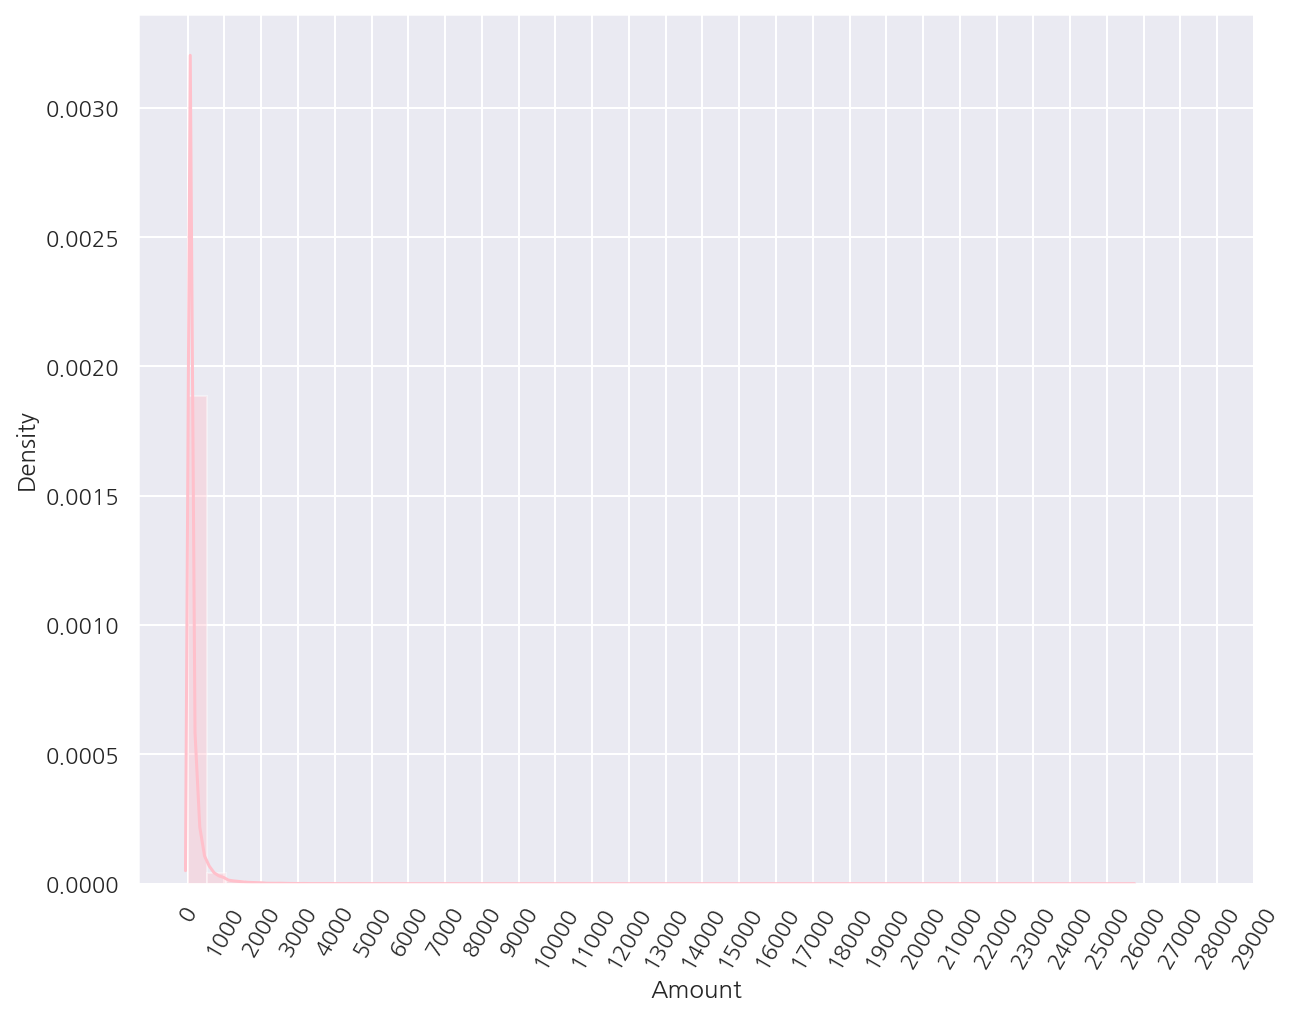

In [31]:
sns.distplot(card_df.Amount, kde = True, color = "pink")
plt.xticks( range(0, 30000, 1000), rotation=60)
plt.show()

- 분포를 확인하였을 때 사용금액이 1,000불 이하가 대부분이며 일부만 매우 큰 금액임을 알 수 있다.


- 로지스틱 회귀 등 대부분 선형 모델은 피처가 정규 분포 형태를 띄는 것을 선호하므로 추가적으로 가공을 진행한다.

**데이터 가공 함수**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# DF 복사 후 Time 컬럼 삭제하고 복사된 DF 반환 + Amount 스케일링
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # Amount 스케일링
    scaler = StandardScaler()
    amount_scaled = scaler.fit_transform(df_copy.Amount.values.reshape(-1,1))
    df_copy.Amount = amount_scaled
    
    df_copy.drop("Time", axis=1, inplace=True)
    return df_copy

# 데이터 가공 후 train, test 반환
def get_train_test_dataset(df=None):
    temp_df = get_preprocessed_df(df)
    
    # 피처, 레이블 분리
    X_features = temp_df.iloc[:,:-1]
    y_target = temp_df.iloc[:,-1]
    
    # train, test 생성, 원 데이터 분포 반영
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                        test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

### 2.3.2 성능 평가

In [33]:
# Amount 스케일링 후 데이터 셋 생성
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

# Logistic Regression 성능 평가
print("### Logistic Regression 성능 평가")
lr_clf2 = LogisticRegression()
get_model_train_eval(lr_clf2, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)

# LightGBM 성능 평가
print("### LightGBM 성능 평가")
lgbm_clf4 = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf4, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)

### Logistic Regression 성능 평가
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC: 0.9702
### LightGBM 성능 평가
오차 행렬
[[85291     4]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9655, 재현율: 0.7568, F1: 0.8485, AUC: 0.9782


- Amount 스케일링 전후 성능 평가 지표의 차이는 크게 없다.

### 2.3.3 데이터 로그 변환

이번에는 StandardScaler가 아닌 로그 변환을 적용해본다.

로그 변환은 데이터 분포가 심하게 왜곡되어 있을 때 적용하는 중요 기법 중 하나로 변환 시 상대적으로 값이 작아지기에 데이터 분포 왜곡을 개선해준다.

**데이터 가공 함수**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# DF 복사 후 Time 컬럼 삭제하고 복사된 DF 반환 + Amount 로그 변환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # Amount 로그 변환
    amount_log_scaled = np.log1p(df_copy.Amount)
    df_copy.Amount = amount_log_scaled
    
    df_copy.drop("Time", axis=1, inplace=True)
    return df_copy

# 데이터 가공 후 train, test 반환
def get_train_test_dataset(df=None):
    temp_df = get_preprocessed_df(df)
    
    # 피처, 레이블 분리
    X_features = temp_df.iloc[:,:-1]
    y_target = temp_df.iloc[:,-1]
    
    # train, test 생성, 원 데이터 분포 반영
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                        test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

### 2.3.4 성능 평가

In [35]:
# Amount 로그 변환 후 데이터 셋 생성
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

# Logistic Regression 성능 평가
print("### Logistic Regression 성능 평가")
lr_clf3 = LogisticRegression()
get_model_train_eval(lr_clf3, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)

# LightGBM 성능 평가
print("### LightGBM 성능 평가")
lgbm_clf5 = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf5, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)

### Logistic Regression 성능 평가
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, AUC: 0.9727
### LightGBM 성능 평가
오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


- Logistic Regression의 경우 대체로 성능이 향상되었고 LightGBM의 경우 큰 차이가 없다.

## 2.4 이상치 제거 및 학습/예측/평가

이번에는 이상치 데이터를 제거하고 학습/예측/평가를 진행해본다.

이상치 기준은 IQR 방식을 적용한다.

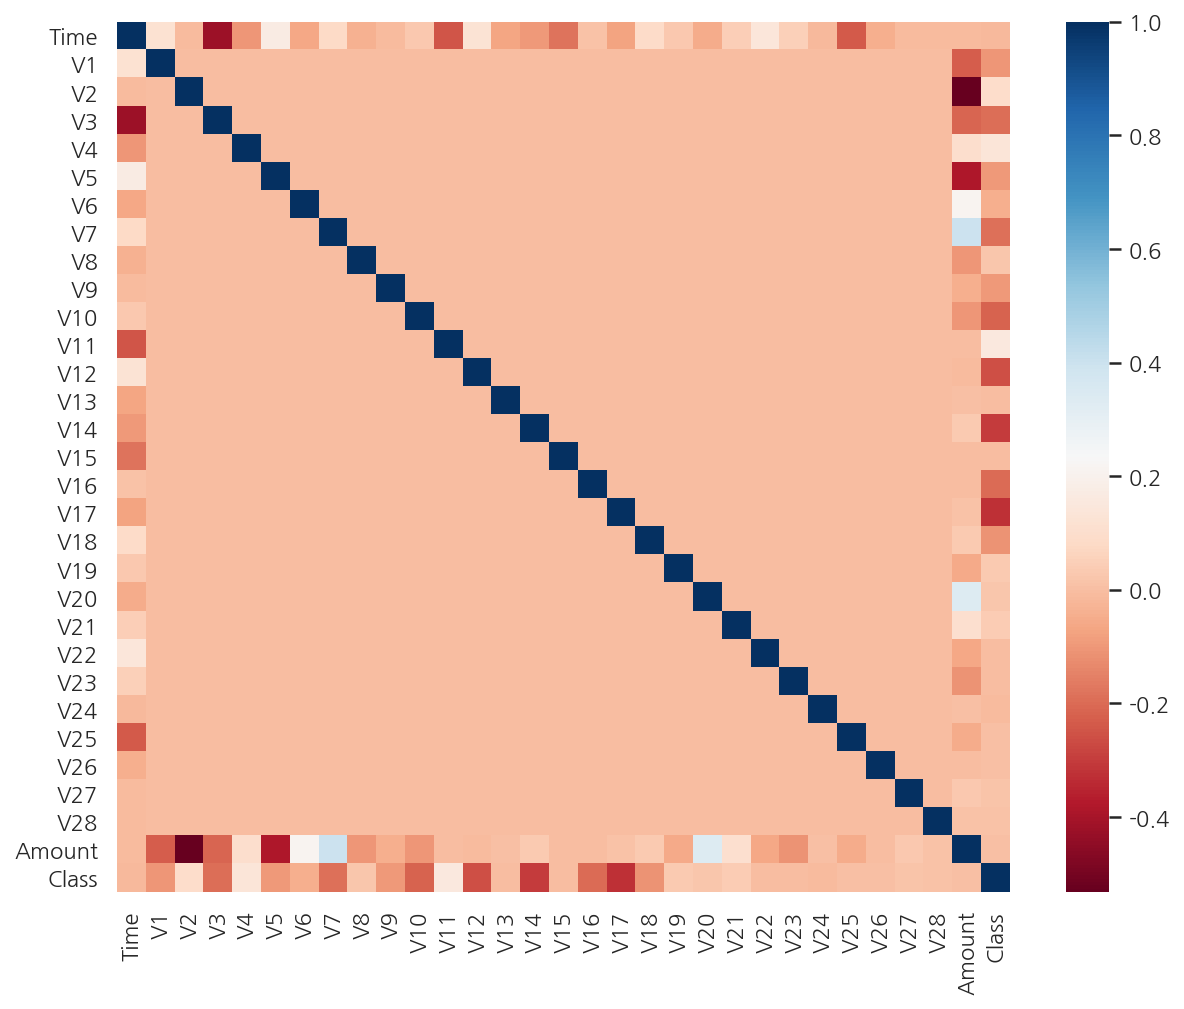

In [36]:
corr_M = card_df.corr()
sns.heatmap(corr_M, cmap="RdBu")
plt.show()

- 상관관계 히트맵에서 Class와 음의 상관관계가 높은 V14와 V17 중 V14에 대해서 이상치 제거를 작업해보기로 한다.

### 2.4.1 데이터 이상치 제거

In [37]:
# IQR 이상치 제거
def get_outlier(df=None, column=None): 
    # Class가 1인 경우만 진행
    fraud = df[df.Class == 1][column]
    
    # IQR 및 Boundary 설정
    Q1 = np.percentile(fraud.values, 25)
    Q3 = np.percentile(fraud.values, 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # 이상치 인덱스 반환
    outlier_index = fraud[ (fraud < lower_bound) | (fraud > upper_bound)].index
    return outlier_index

get_outlier(card_df, "V14")

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

- IQR 방식으로 이상치 인덱스를 반환하는 함수를 생성하였다.


- 이상치 인덱스는 Class가 1인 경우만 찾았다.

**데이터 가공 함수**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Time 삭제후 DF 반환 + Amount 로그 변환 + 이상치 제거
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # Amount 로그 변환
    amount_log_scaled = np.log1p(df_copy.Amount)
    df_copy.Amount = amount_log_scaled
    
    # IQR 이상치 제거
    outlier_index = get_outlier(df_copy, "V14")
    df_copy.drop(outlier_index, axis=0, inplace=True)
    
    # Time 삭제
    df_copy.drop("Time", axis=1, inplace=True)
    return df_copy

# 데이터 가공 후 train, test 반환
def get_train_test_dataset(df=None):
    temp_df = get_preprocessed_df(df)
    
    # 피처, 레이블 분리
    X_features = temp_df.iloc[:,:-1]
    y_target = temp_df.iloc[:,-1]
    
    # train, test 생성, 원 데이터 분포 반영
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                        test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

### 2.4.2 성능 평가

In [39]:
# 이상치 제거 추가 후 데이터 셋 생성
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

# Logistic Regression 성능 평가
print("### Logistic Regression 성능 평가")
lr_clf4 = LogisticRegression()
get_model_train_eval(lr_clf4, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)

# LightGBM 성능 평가
print("### LightGBM 성능 평가")
lgbm_clf6 = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf6, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)

### Logistic Regression 성능 평가
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC: 0.9743
### LightGBM 성능 평가
오차 행렬
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288, F1: 0.8930, AUC: 0.9791


- 이상치 제거 후 두 모델 모두 모든 예측 성능이 크게 향상 되었다.

## 2.5 SMOTE 오버 샘플링 및 학습/예측/평가

### 2.5.1 SMOTE 오버 샘플링

이번에는 SMOTE 오버 샘플링 후 학습/예측/평가를 진행해본다.

주의할 점은 SMOTE 오버 샘플링은 반드시 train set에만 적용하여야 한다.

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

print("SMOTE 적용 전 train 피처/레이블 shape", X_train.shape, y_train.shape)
print("SMOTE 적용 후 train 피처/레이블 shape", X_train_over.shape, y_train_over.shape)
print("-"*60)
print("SMOTE 적용 후 레이블 분포")
print(y_train_over.value_counts())

SMOTE 적용 전 train 피처/레이블 shape (199362, 29) (199362,)
SMOTE 적용 후 train 피처/레이블 shape (398040, 29) (398040,)
------------------------------------------------------------
SMOTE 적용 후 레이블 분포
1    199020
0    199020
Name: Class, dtype: int64


- SMOTE 오버 샘플링 이후 데이터가 대략 2배 정도 증가하였다.


- 또한 레이블 값이 0과 1의 분포가 동일하게 생성되었다.

### 2.5.2 성능 평가

In [41]:
# 이상치 제거 추가 후 데이터 셋 생성
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

# SMOTE 오버 샘플링
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

# Logistic Regression 성능 평가
print("### Logistic Regression 성능 평가")
lr_clf5 = LogisticRegression()
get_model_train_eval(lr_clf5, train_x=X_train_over, test_x=X_test, train_y=y_train_over, test_y=y_test)

# LightGBM 성능 평가
print("### LightGBM 성능 평가")
lgbm_clf7 = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf7, train_x=X_train_over, test_x=X_test, train_y=y_train_over, test_y=y_test)

### Logistic Regression 성능 평가
오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247, F1: 0.1023, AUC: 0.9737
### LightGBM 성능 평가
오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493, F1: 0.8794, AUC: 0.9814


- 두 모델 모두 재현율은 증가한 반면 정밀도는 크게 감소하였으며 특히 로지스틱의 경우 정밀도가 심각하게 저하됐다.


- 이는 SMOTE 오버 샘플링으로 인해 실제 샘플에서보다 많은 레이블 1값을 학습하면서 지나치게 1로 예측을 하였기 때문이다.


- 정밀도와 재현율의 트레이드 오프를 생각하면 SMOTE를 적용하였을 때 정밀도의 감소, 재현율의 증가는 일반적인 현상이다.


- 좋은 SMOTE 패키지일수록 정밀도의 감소율은 낮추고 재현율의 증가율은 높일 수 있도록 데이터를 증식한다.